# Compfest Bizzt 2025 - Bulu Kuduk Merinding


## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)

## EDA (Exploratory Data Analysis)

### Produk

In [ ]:
df_produk = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v3.csv')

In [ ]:
df_produk

id_produk  kode_sku                       nama_produk kategori_produk  \
0      P0000001  SKU12286         My Roti Roti Srikaya 350g            Roti   
1      P0000002  SKU03769         Pepsi Soda Original 500ml            Soda   
2      P0000003  SKU03972         Tango Biskuit Cokelat 50g         Biskuit   
3      P0000004  SKU09154      Frisian Flag Susu Moka 125ml            Susu   
4      P0000005  SKU09609  Delfi Cokelat Dark Chocolate 65g         Cokelat   
...         ...       ...                               ...             ...   
89893  P0089894  SKU03922       Sari Roti Roti Srikaya 350g            Roti   
89894  P0089895  SKU14001          Marjan Sirup Mawar 460ml           Sirup   
89895  P0089896  SKU10520           Tango Biskuit Susu 150g         Biskuit   
89896  P0089897  SKU04367             Aoka Roti Srikaya 70g            Roti   
89897  P0089898  SKU03506        Sari Roti Roti Cokelat 70g            Roti   

              brand  harga_beli  harga_jual  margin ukuran            rasa  \
0           My Roti       30300       37900  0.2005   350g         Srikaya   
1             Pepsi        6900        8200  0.1585  500ml        Original   
2             Tango        4500        5800  0.2241    50g         Cokelat   
3      Frisian Flag        5400        7000  0.2286  125ml            Moka   
4             Delfi       12400       14900  0.1678    65g  Dark Chocolate   
...             ...         ...         ...     ...    ...             ...   
89893     Sari Roti        7300        9200  0.2065   350g         Srikaya   
89894        Marjan       11500       14300  0.1958  460ml           Mawar   
89895         Tango        7200        8900  0.1910   150g            Susu   
89896          Aoka        1800        2100  0.1429    70g         Srikaya   
89897     Sari Roti        1700        2000  0.1500    70g         Cokelat   

       kalori expire_date  hari_jual_minimal  id_toko  produk_musiman  \
0         359  2025-08-21                  2        1           False   
1         181  2026-08-13                  7        1           False   
2         175  2026-02-20                 14        1           False   
3          96  2026-04-14                  5        1           False   
4         421  2026-08-12                 20        1           False   
...       ...         ...                ...      ...             ...   
89893     287  2025-08-19                  2        7           False   
89894     214  2026-12-20                 30        7           False   
89895     225  2026-03-28                 14        7            True   
89896     264  2025-08-23                  2        7           False   
89897     121  2025-08-21                  2        7           False   

       harga_kompetitor  
0                 36700  
1                  9800  
2                  5200  
3                  6900  
4                 14600  
...                 ...  
89893              9700  
89894             14200  
89895             10100  
89896              2200  
89897              2000  

[89898 rows x 16 columns]

In [ ]:
display(df_produk['kategori_produk'].value_counts().reset_index())

kategori_produk  count
0            Soda  15304
1           Sirup  15265
2            Roti  15022
3            Susu  14976
4         Cokelat  14705
5         Biskuit  14626

In [ ]:
category_counts = df_produk['kategori_produk'].value_counts().reset_index()
category_counts.columns = ['Kategori', 'Jumlah Produk']

fig = px.bar(category_counts, x='Kategori', y='Jumlah Produk',
             title='Distribusi Jumlah Produk per Kategori',
             labels={'Kategori': 'Kategori Produk', 'Jumlah Produk': 'Jumlah Produk'},
             template='plotly_white')

fig.show()

In [ ]:
store_counts = df_produk['id_toko'].value_counts().reset_index()
store_counts.columns = ['Toko', 'Jumlah Produk']

fig = px.bar(store_counts, x='Toko', y='Jumlah Produk',
             title='Distribusi Jumlah Produk per Toko',
             labels={'Toko': 'Nomor Toko', 'Jumlah Produk': 'Jumlah Produk'},
             template='plotly_white')

fig.show()

In [ ]:
fig_scatter_harga = px.scatter(df_produk, x='harga_beli', y='harga_jual',
                               title='Hubungan Harga Beli dan Harga Jual',
                               labels={'harga_beli': 'Harga Beli', 'harga_jual': 'Harga Jual'},
                               template='plotly_white',
                               hover_data=['nama_produk', 'brand', 'kategori_produk'])
fig_scatter_harga.show()

In [ ]:
jumlah_sku_unik = df_produk['kode_sku'].nunique()
print(f"Jumlah kode_sku yang unik adalah: {jumlah_sku_unik}")

Jumlah kode_sku yang unik adalah: 18374


In [ ]:
fig_box_margin_category = px.box(df_produk, x='kategori_produk', y='margin',
                                 title='Distribusi Margin Keuntungan per Kategori Produk',
                                 labels={'kategori_produk': 'Kategori Produk', 'margin': 'Margin Keuntungan'},
                                 template='plotly_white')
fig_box_margin_category.show()

In [ ]:
seasonal_counts = df_produk['produk_musiman'].value_counts().reset_index()
seasonal_counts.columns = ['Produk Musiman', 'Jumlah Produk']

fig = px.bar(seasonal_counts, x='Produk Musiman', y='Jumlah Produk',
             title='Jumlah Produk Musiman vs. Non-Musiman',
             labels={'Produk Musiman': 'Produk Musiman', 'Jumlah Produk': 'Jumlah Produk'},
             template='plotly_white')

fig.show()

### Toko

In [ ]:
df_toko = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/toko.csv')

In [ ]:
df_toko

id_toko  buka_sejak  ukuran  jumlah_sku  jumlah_karyawan         tipe  \
0        1        2015     180        9235                4   permukiman   
1        2        2017     193       12311                5   permukiman   
2        3        2018     220       14501                6     campuran   
3        4        2020     195       13122                5     campuran   
4        5        2022     175        7372                3  perkantoran   
5        6        2024     230       14983                6  perkantoran   
6        7        2025     329       18374                7  jalan_utama   

                                       umur_konsumen  \
0  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
1  gen_alpha: 0.15, gen_z: 0.35, gen_y: 0.30, gen...   
2  gen_alpha: 0.05, gen_z: 0.25, gen_y: 0.45, gen...   
3  gen_alpha: 0.05, gen_z: 0.30, gen_y: 0.40, gen...   
4  gen_alpha: 0.02, gen_z: 0.20, gen_y: 0.50, gen...   
5  gen_alpha: 0.03, gen_z: 0.15, gen_y: 0.45, gen...   
6  gen_alpha: 0.05, gen_z: 0.25, gen_y: 0.40, gen...   

             jenis_kelamin_konsumen  \
0  perempuan: 0.60, laki-laki: 0.40   
1  perempuan: 0.55, laki-laki: 0.45   
2  perempuan: 0.50, laki-laki: 0.50   
3  perempuan: 0.45, laki-laki: 0.55   
4  perempuan: 0.45, laki-laki: 0.55   
5  perempuan: 0.50, laki-laki: 0.50   
6  perempuan: 0.50, laki-laki: 0.50   

                       penghasilan_konsumen_avg  \
0  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
1  terbatas: 0.30, menengah: 0.55, tinggi: 0.15   
2  terbatas: 0.15, menengah: 0.65, tinggi: 0.20   
3  terbatas: 0.20, menengah: 0.60, tinggi: 0.20   
4  terbatas: 0.05, menengah: 0.45, tinggi: 0.50   
5  terbatas: 0.10, menengah: 0.40, tinggi: 0.50   
6  terbatas: 0.15, menengah: 0.60, tinggi: 0.25   

                                  pekerjaan_konsumen  \
0  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
1  pelajar_mahasiswa: 0.30, pekerja_kantoran: 0.3...   
2  pelajar_mahasiswa: 0.15, pekerja_kantoran: 0.6...   
3  pelajar_mahasiswa: 0.20, pekerja_kantoran: 0.5...   
4  pelajar_mahasiswa: 0.05, pekerja_kantoran: 0.8...   
5  pelajar_mahasiswa: 0.05, pekerja_kantoran: 0.8...   
6  pelajar_mahasiswa: 0.10, pekerja_kantoran: 0.7...   

                kebiasaan_konsumen  \
0  impulsif: 0.40, terencana: 0.60   
1  impulsif: 0.45, terencana: 0.55   
2  impulsif: 0.55, terencana: 0.45   
3  impulsif: 0.60, terencana: 0.40   
4  impulsif: 0.65, terencana: 0.35   
5  impulsif: 0.50, terencana: 0.50   
6  impulsif: 0.70, terencana: 0.30   

                                        reaksi_promo  \
0  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
1  pemburu_promo: 0.40, oportunis: 0.40, loyal: 0.20   
2  pemburu_promo: 0.30, oportunis: 0.50, loyal: 0.20   
3  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
4  pemburu_promo: 0.20, oportunis: 0.55, loyal: 0.25   
5  pemburu_promo: 0.25, oportunis: 0.50, loyal: 0.25   
6  pemburu_promo: 0.45, oportunis: 0.40, loyal: 0.15   

                          frekuensi_pembelian  \
0  sering: 0.40, sesekali: 0.50, jarang: 0.10   
1  sering: 0.35, sesekali: 0.55, jarang: 0.10   
2  sering: 0.25, sesekali: 0.60, jarang: 0.15   
3  sering: 0.30, sesekali: 0.50, jarang: 0.20   
4  sering: 0.15, sesekali: 0.70, jarang: 0.15   
5  sering: 0.20, sesekali: 0.65, jarang: 0.15   
6  sering: 0.10, sesekali: 0.60, jarang: 0.30   

                                    waktu_pembelian  
0  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
1  pagi: 0.20, siang: 0.30, sore: 0.40, malam: 0.10  
2  pagi: 0.15, siang: 0.40, sore: 0.35, malam: 0.10  
3  pagi: 0.10, siang: 0.45, sore: 0.40, malam: 0.05  
4  pagi: 0.10, siang: 0.50, sore: 0.35, malam: 0.05  
5  pagi: 0.15, siang: 0.45, sore: 0.30, malam: 0.10  
6  pagi: 0.15, siang: 0.35, sore: 0.45, malam: 0.05

### Generate Transaksi

In [ ]:
# import pandas as pd
# import numpy as np
# import datetime
# import random
# import os

# # --- BAGIAN 1: PENGATURAN DAN PRA-PEMROSESAN ---
# print("Membaca file produk...")
# produk_df = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_revisi.csv')

# # Membersihkan dan mengubah tipe data kolom margin
# produk_df['margin'] = pd.to_numeric(produk_df['margin'].astype(str).str.replace('%', ''), errors='coerce') / 100

# # Definisi data statis berdasarkan aturan
# toko_buka = {
#     1: 2015, 2: 2017, 3: 2018, 4: 2020,
#     5: 2022, 6: 2024, 7: 2025
# }

# masa_simpan_kategori = {
#     'Minuman Segar': 14, 'Susu UHT': 365, 'Snack': 270, 'Frozen Food': 365,
#     'Makanan Kaleng': 540, 'Buah Segar': 7, 'Sirup': 365, 'Biskuit': 365,
#     'Minuman Manis': 365, 'Cokelat': 365, 'Kopi': 365, 'Teh': 365,
#     'Roti': 10, 'Minyak Goreng': 540, 'Bumbu Masak': 365, 'Kacang': 270,
#     'Sereal': 365, 'Mie Instan': 270, 'Daging Olahan': 180, 'Keju': 180,
#     'Yogurt': 30, 'Telur': 30, 'Sayuran Segar': 7, 'Daging Segar': 7,
#     'Default': 365
# }

# hari_jual_range = {
#     'Minuman Segar': (1, 14), 'Susu UHT': (15, 180), 'Snack': (15, 180),
#     'Sirup': (15, 180), 'Frozen Food': (30, 300), 'Makanan Kaleng': (30, 300),
#     'Buah Segar': (1, 7), 'Sayuran Segar': (1, 7), 'Daging Segar': (1, 7),
#     'Roti': (1, 7), 'Default': (15, 180)
# }

# events_calendar = {
#     "Ramadan": (datetime.date(2023, 3, 22), datetime.date(2023, 4, 21)),
#     "Natal": (datetime.date(2023, 12, 15), datetime.date(2023, 12, 25)),
#     "Tahun Baru": (datetime.date(2023, 12, 26), datetime.date(2024, 1, 2)),
#     "Ramadan_2024": (datetime.date(2024, 3, 10), datetime.date(2024, 4, 9)),
#     "Natal_2024": (datetime.date(2024, 12, 15), datetime.date(2024, 12, 25)),
#     "Tahun Baru_2024": (datetime.date(2024, 12, 26), datetime.date(2025, 1, 2)),
# }

# # --- BAGIAN 2: FUNGSI LOGIKA GENERATOR ---
# def get_current_event(date):
#     for event, (start, end) in events_calendar.items():
#         if start <= date <= end:
#             return event.split('_')[0]
#     if date.weekday() >= 4:
#         return "Promo Akhir Pekan"
#     return None

# def generate_transactions(start_date, end_date, product_df):
#     transactions = []
#     current_date = start_date
#     dataset_start_date = datetime.date(2023, 1, 1)

#     while current_date <= end_date:
#         minggu = (current_date - dataset_start_date).days // 7 + 1
#         current_event = get_current_event(current_date)

#         active_stores = [id_toko for id_toko, buka_thn in toko_buka.items() if buka_thn <= current_date.year]

#         for id_toko in active_stores:
#             if id_toko <= 4: base_vol = random.randint(120, 160)
#             elif id_toko == 5: base_vol = random.randint(80, 110)
#             else: base_vol = random.randint(30, 50)

#             if current_event in ["Ramadan", "Natal", "Tahun Baru"]:
#                 volume_multiplier = random.uniform(1.3, 1.6)
#             elif current_event == "Promo Akhir Pekan":
#                 volume_multiplier = random.uniform(1.1, 1.3)
#             else:
#                 volume_multiplier = random.uniform(0.9, 1.1)

#             daily_transactions = int(base_vol * volume_multiplier)

#             store_products = product_df[product_df['id_toko'] == id_toko]
#             if store_products.empty: continue

#             for _ in range(daily_transactions):
#                 weights = pd.Series(1, index=store_products.index)
#                 if current_event == "Ramadan":
#                     weights[store_products['kategori_produk'].isin(['Sirup', 'Biskuit', 'Minuman Manis'])] = 5
#                 elif current_event == "Natal":
#                     weights[store_products['kategori_produk'].isin(['Cokelat', 'Biskuit'])] = 5
#                 elif current_event == "Tahun Baru":
#                     weights[store_products['kategori_produk'].isin(['Snack', 'Minuman Manis', 'Frozen Food'])] = 5

#                 product = store_products.sample(n=1, weights=weights).iloc[0]

#                 category = product['kategori_produk']
#                 h_range = hari_jual_range.get(category, hari_jual_range['Default'])
#                 hari_jual = random.randint(h_range[0], h_range[1])
#                 masa_simpan = masa_simpan_kategori.get(category, masa_simpan_kategori['Default'])
#                 kedaluwarsa = masa_simpan - hari_jual

#                 diskon = 0.0
#                 if 0 <= kedaluwarsa <= 7:
#                     diskon = random.uniform(0.30, 0.50)
#                 elif current_event is not None:
#                     if current_event == "Ramadan" and category in ['Sirup', 'Biskuit', 'Minuman Manis']:
#                         diskon = random.uniform(0.10, 0.25)
#                     elif current_event == "Natal" and category in ['Cokelat', 'Biskuit']:
#                         diskon = random.uniform(0.05, 0.20)
#                     elif current_event == "Tahun Baru" and category in ['Snack', 'Minuman Manis']:
#                         diskon = random.uniform(0.05, 0.15)
#                     elif current_event == "Promo Akhir Pekan":
#                         diskon = random.uniform(0.05, 0.20)

#                 harga_jual = product['harga_jual']
#                 harga_beli = product['harga_beli']

#                 if diskon > 0 and (1 - diskon) > 0.95:
#                     diskon = max(diskon, 0.05)

#                 harga_promosi = harga_jual * (1 - diskon)
#                 harga_promosi = round(harga_promosi / 100) * 100 if harga_promosi > 1000 else round(harga_promosi / 50) * 50

#                 if harga_promosi > harga_jual: harga_promosi = harga_jual
#                 diskon_margin = (harga_promosi - harga_beli) / harga_promosi if harga_promosi > 0 else -1

#                 transactions.append({
#                     'id_produk': product['id_produk'], 'minggu': minggu,
#                     'current_event': current_event, 'id_toko': id_toko,
#                     'harga_promosi': harga_promosi, 'diskon': round(diskon, 4),
#                     'diskon_margin': round(diskon_margin, 4), 'hari_jual': hari_jual,
#                     'kedaluwarsa': kedaluwarsa, 'tanggal_transaksi': current_date
#                 })

#         current_date += datetime.timedelta(days=1)

#     return pd.DataFrame(transactions)

# print("\nSemua fungsi dan data telah siap. Silakan jalankan sel batch di bawah ini.")

In [ ]:
# import pandas as pd
# import numpy as np
# import datetime
# import random
# import os

# # --- BAGIAN 1: PENGATURAN DAN PRA-PEMROSESAN ---
# # Catatan: Kode ini mengasumsikan file CSV di URL ini sudah disesuaikan
# # atau Anda menggunakan file lokal dengan 6 kategori baru.
# print("Membaca file produk...")
# try:
#     produk_df = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_revisi.csv')
# except Exception as e:
#     print(f"Gagal membaca file CSV. Pastikan koneksi internet stabil atau file tersedia. Error: {e}")
#     # Hentikan eksekusi jika data produk tidak dapat dimuat
#     exit()


# # Membersihkan dan mengubah tipe data kolom margin (jika ada)
# if 'margin' in produk_df.columns:
#     produk_df['margin'] = pd.to_numeric(produk_df['margin'].astype(str).str.replace('%', ''), errors='coerce') / 100

# # === ATURAN BISNIS BARU ===
# # Definisi data statis berdasarkan aturan baru
# toko_buka = {
#     1: 2015, 2: 2017, 3: 2018, 4: 2020,
#     5: 2022, 6: 2024, 7: 2025
# }

# # [DISESUAIKAN] Masa simpan untuk 6 kategori baru
# masa_simpan_kategori = {
#     'Susu': 365, 'Biskuit': 365, 'Sirup': 365, 'Soda': 365,
#     'Cokelat': 365, 'Roti': 10, 'Default': 365
# }

# # [DISESUAIKAN] Rentang hari produk terjual untuk 6 kategori baru
# hari_jual_range = {
#     'Roti': (1, 7),
#     'Susu': (15, 180), 'Biskuit': (15, 180), 'Sirup': (15, 180),
#     'Soda': (15, 180), 'Cokelat': (15, 180),
#     'Default': (15, 180)
# }

# # [DIPERBARUI] Kalender event diperluas untuk mencakup tahun-tahun mendatang
# events_calendar = {
#     "Ramadan_2023": (datetime.date(2023, 3, 22), datetime.date(2023, 4, 21)),
#     "Natal_2023": (datetime.date(2023, 12, 15), datetime.date(2023, 12, 25)),
#     "Tahun Baru_2023": (datetime.date(2023, 12, 26), datetime.date(2024, 1, 2)),
#     "Ramadan_2024": (datetime.date(2024, 3, 10), datetime.date(2024, 4, 9)),
#     "Natal_2024": (datetime.date(2024, 12, 15), datetime.date(2024, 12, 25)),
#     "Tahun Baru_2024": (datetime.date(2024, 12, 26), datetime.date(2025, 1, 2)),
#     "Ramadan_2025": (datetime.date(2025, 2, 28), datetime.date(2025, 3, 29)), # Ditambahkan
#     "Natal_2025": (datetime.date(2025, 12, 15), datetime.date(2025, 12, 25)), # Ditambahkan
#     "Tahun Baru_2025": (datetime.date(2025, 12, 26), datetime.date(2026, 1, 2)), # Ditambahkan
# }

# # --- BAGIAN 2: FUNGSI LOGIKA GENERATOR ---
# def get_current_event(date):
#     """Mendapatkan event yang sedang berlangsung pada tanggal tertentu."""
#     for event, (start, end) in events_calendar.items():
#         if start <= date <= end:
#             return event.split('_')[0] # Mengambil nama event utama (e.g., "Ramadan")
#     if date.weekday() >= 4: # Jumat (4), Sabtu (5), Minggu (6)
#         return "Promo Akhir Pekan"
#     return "Hari Biasa"

# def generate_transactions(start_date, end_date, product_df):
#     """Fungsi utama untuk men-generate data transaksi dalam rentang tanggal tertentu."""
#     transactions = []
#     current_date = start_date
#     dataset_start_date = datetime.date(2023, 1, 1)

#     print(f"Memulai generasi data dari {start_date} hingga {end_date}...")

#     while current_date <= end_date:
#         minggu = (current_date - dataset_start_date).days // 7 + 1
#         current_event = get_current_event(current_date)

#         active_stores = [id_toko for id_toko, buka_thn in toko_buka.items() if buka_thn <= current_date.year]

#         for id_toko in active_stores:
#             # Menentukan volume transaksi dasar per toko
#             if id_toko <= 4: base_vol = random.randint(120, 160)
#             elif id_toko == 5: base_vol = random.randint(80, 110)
#             else: base_vol = random.randint(30, 50)

#             # Pengali volume berdasarkan event
#             if current_event in ["Ramadan", "Natal", "Tahun Baru"]:
#                 volume_multiplier = random.uniform(1.3, 1.6)
#             elif current_event == "Promo Akhir Pekan":
#                 volume_multiplier = random.uniform(1.1, 1.3)
#             else: # Hari Biasa
#                 volume_multiplier = random.uniform(0.9, 1.1)

#             daily_transactions = int(base_vol * volume_multiplier)

#             store_products = product_df[product_df['id_toko'] == id_toko].copy()
#             if store_products.empty: continue

#             # [DISESUAIKAN] Logika bobot penjualan untuk kategori baru
#             weights = pd.Series(1, index=store_products.index)
#             if current_event == "Ramadan":
#                 promo_cats = ['Sirup', 'Biskuit']
#                 weights[store_products['kategori_produk'].isin(promo_cats)] = 5
#             elif current_event == "Natal":
#                 promo_cats = ['Cokelat', 'Biskuit']
#                 weights[store_products['kategori_produk'].isin(promo_cats)] = 5
#             elif current_event == "Tahun Baru":
#                 promo_cats = ['Soda', 'Cokelat']
#                 weights[store_products['kategori_produk'].isin(promo_cats)] = 5

#             # Men-generate setiap transaksi untuk hari itu
#             sampled_products = store_products.sample(n=daily_transactions, weights=weights, replace=True)

#             for _, product in sampled_products.iterrows():
#                 category = product['kategori_produk']

#                 # Menghitung sisa masa simpan produk
#                 h_range = hari_jual_range.get(category, hari_jual_range['Default'])
#                 hari_jual = random.randint(h_range[0], h_range[1])
#                 masa_simpan = masa_simpan_kategori.get(category, masa_simpan_kategori['Default'])
#                 kedaluwarsa = masa_simpan - hari_jual

#                 # Menentukan diskon
#                 diskon = 0.0
#                 # Diskon besar jika produk akan kedaluwarsa
#                 if 0 <= kedaluwarsa <= 7:
#                     diskon = random.uniform(0.30, 0.50)
#                 # Diskon promosi berdasarkan event
#                 elif current_event != "Hari Biasa":
#                     # [DISESUAIKAN] Logika diskon untuk kategori baru
#                     if current_event == "Ramadan" and category in ['Sirup', 'Biskuit']:
#                         diskon = random.uniform(0.10, 0.25)
#                     elif current_event == "Natal" and category in ['Cokelat', 'Biskuit']:
#                         diskon = random.uniform(0.05, 0.20)
#                     elif current_event == "Tahun Baru" and category in ['Soda', 'Cokelat']:
#                         diskon = random.uniform(0.05, 0.15)
#                     elif current_event == "Promo Akhir Pekan":
#                         diskon = random.uniform(0.05, 0.20)

#                 # Menghitung harga final dan margin
#                 harga_jual = product['harga_jual']
#                 harga_beli = product['harga_beli']

#                 harga_promosi = harga_jual * (1 - diskon)
#                 # Pembulatan harga untuk realisme
#                 harga_promosi = round(harga_promosi / 100) * 100 if harga_promosi > 1000 else round(harga_promosi / 50) * 50

#                 if harga_promosi > harga_jual: harga_promosi = harga_jual
#                 if harga_promosi <= harga_beli: harga_promosi = harga_beli + random.randint(100, 500) # Hindari jual rugi

#                 margin_promosi = (harga_promosi - harga_beli) / harga_promosi if harga_promosi > 0 else 0

#                 transactions.append({
#                     'id_produk': product['id_produk'],
#                     'minggu': minggu,
#                     'tanggal_transaksi': current_date,
#                     'current_event': current_event,
#                     'id_toko': id_toko,
#                     'harga_promosi': harga_promosi,
#                     'diskon': round(diskon, 4),
#                     'margin_promosi': round(margin_promosi, 4),
#                     'hari_jual': hari_jual,
#                     'kedaluwarsa': kedaluwarsa,
#                 })

#         current_date += datetime.timedelta(days=1)
#         if current_date.day == 1:
#             print(f"  ... memproses bulan {current_date.strftime('%B %Y')}")

#     return pd.DataFrame(transactions)

# print("\nSemua fungsi dan data telah siap. Silakan jalankan sel batch di bawah ini.")

In [ ]:
import pandas as pd
import numpy as np
import datetime
import random
import os

# --- BAGIAN 1: PENGATURAN DAN PRA-PEMROSESAN ---
# Catatan: Kode ini mengasumsikan file CSV di URL ini sudah disesuaikan
# atau Anda menggunakan file lokal dengan 6 kategori baru.
print("Membaca file produk...")
try:
    produk_df = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_revisi.csv')
except Exception as e:
    print(f"Gagal membaca file CSV. Pastikan koneksi internet stabil atau file tersedia. Error: {e}")
    # Hentikan eksekusi jika data produk tidak dapat dimuat
    exit()


# Membersihkan dan mengubah tipe data kolom margin (jika ada)
if 'margin' in produk_df.columns:
    produk_df['margin'] = pd.to_numeric(produk_df['margin'].astype(str).str.replace('%', ''), errors='coerce') / 100

# === ATURAN BISNIS BARU ===
# Definisi data statis berdasarkan aturan baru
toko_buka = {
    1: 2015, 2: 2017, 3: 2018, 4: 2020,
    5: 2022, 6: 2024, 7: 2025
}

# [DISESUAIKAN] Masa simpan untuk 6 kategori baru
masa_simpan_kategori = {
    'Susu': 365, 'Biskuit': 365, 'Sirup': 365, 'Soda': 365,
    'Cokelat': 365, 'Roti': 10, 'Default': 365
}

# [DISESUAIKAN] Rentang hari produk terjual untuk 6 kategori baru
hari_jual_range = {
    'Roti': (1, 7),
    'Susu': (15, 180), 'Biskuit': (15, 180), 'Sirup': (15, 180),
    'Soda': (15, 180), 'Cokelat': (15, 180),
    'Default': (15, 180)
}

# [DIPERBARUI] Kalender event diperluas untuk mencakup tahun-tahun mendatang
events_calendar = {
    "Ramadan_2023": (datetime.date(2023, 3, 22), datetime.date(2023, 4, 21)),
    "Natal_2023": (datetime.date(2023, 12, 15), datetime.date(2023, 12, 25)),
    "Tahun Baru_2023": (datetime.date(2023, 12, 26), datetime.date(2024, 1, 2)),
    "Ramadan_2024": (datetime.date(2024, 3, 10), datetime.date(2024, 4, 9)),
    "Natal_2024": (datetime.date(2024, 12, 15), datetime.date(2024, 12, 25)),
    "Tahun Baru_2024": (datetime.date(2024, 12, 26), datetime.date(2025, 1, 2)),
    "Ramadan_2025": (datetime.date(2025, 2, 28), datetime.date(2025, 3, 29)), # Ditambahkan
    "Natal_2025": (datetime.date(2025, 12, 15), datetime.date(2025, 12, 25)), # Ditambahkan
    "Tahun Baru_2025": (datetime.date(2025, 12, 26), datetime.date(2026, 1, 2)), # Ditambahkan
}

# --- BAGIAN 2: FUNGSI LOGIKA GENERATOR ---
def get_current_event(date):
    """Mendapatkan event yang sedang berlangsung pada tanggal tertentu."""
    for event, (start, end) in events_calendar.items():
        if start <= date <= end:
            return event.split('_')[0] # Mengambil nama event utama (e.g., "Ramadan")
    if date.weekday() >= 4: # Jumat (4), Sabtu (5), Minggu (6)
        return "Promo Akhir Pekan"
    return "Hari Biasa"

def generate_transactions(start_date, end_date, product_df):
    """
    [DIROMBAK v2] Fungsi utama untuk men-generate data transaksi
    dengan tambahan 'Discount Perkenalan'.
    """
    transactions = []
    current_date = start_date
    dataset_start_date = datetime.date(2023, 1, 1)

    # [BARU] Definisikan periode perkenalan dalam hari
    PERIODE_PERKENALAN_HARI = 45

    print(f"Memulai generasi data dari {start_date} hingga {end_date}...")

    while current_date <= end_date:
        minggu = (current_date - dataset_start_date).days // 7 + 1
        current_event = get_current_event(current_date)

        active_stores = [id_toko for id_toko, buka_thn in toko_buka.items() if buka_thn <= current_date.year]

        for id_toko in active_stores:
            # ... (kode volume transaksi dan bobot tetap sama) ...
            if id_toko <= 4: base_vol = random.randint(120, 160)
            elif id_toko == 5: base_vol = random.randint(80, 110)
            else: base_vol = random.randint(30, 50)

            if current_event in ["Ramadan", "Natal", "Tahun Baru"]:
                volume_multiplier = random.uniform(1.3, 1.6)
            elif current_event == "Promo Akhir Pekan":
                volume_multiplier = random.uniform(1.1, 1.3)
            else:
                volume_multiplier = random.uniform(0.9, 1.1)

            daily_transactions = int(base_vol * volume_multiplier)

            store_products = product_df[product_df['id_toko'] == id_toko].copy()
            if store_products.empty: continue

            weights = pd.Series(1, index=store_products.index)
            if current_event == "Ramadan":
                promo_cats = ['Sirup', 'Biskuit']
                weights[store_products['kategori_produk'].isin(promo_cats)] = 5
            elif current_event == "Natal":
                promo_cats = ['Cokelat', 'Biskuit']
                weights[store_products['kategori_produk'].isin(promo_cats)] = 5
            elif current_event == "Tahun Baru":
                promo_cats = ['Soda', 'Cokelat']
                weights[store_products['kategori_produk'].isin(promo_cats)] = 5

            sampled_products = store_products.sample(n=daily_transactions, weights=weights, replace=True)

            for _, product in sampled_products.iterrows():
                category = product['kategori_produk']

                h_range = hari_jual_range.get(category, hari_jual_range['Default'])
                hari_jual = random.randint(h_range[0], h_range[1])
                masa_simpan = masa_simpan_kategori.get(category, masa_simpan_kategori['Default'])
                kedaluwarsa = masa_simpan - hari_jual

                # --- [DIUBAH] Blok Logika Penentuan Diskon Diperkaya ---
                diskon = 0.0
                tipe_diskon = 'Tanpa Diskon'

                # [BARU] Tentukan 'launch_date' produk di toko ini
                buka_tahun = toko_buka.get(id_toko, current_date.year)
                # Anggap produk 'launch' pada 15 Januari di tahun toko buka,
                # atau pada awal simulasi jika toko sudah lama buka.
                launch_date = datetime.date(max(buka_tahun, dataset_start_date.year), 1, 15)
                hari_sejak_launch = (current_date - launch_date).days

                # Urutan prioritas: Expired > BOGO > Perkenalan > Event Besar > Promo Biasa

                if 0 <= kedaluwarsa <= 14:
                    diskon = random.uniform(0.30, 0.50)
                    tipe_diskon = 'Expired Discount'

                elif current_event == "Promo Akhir Pekan" and category in ['Biskuit', 'Soda', 'Cokelat'] and random.random() < 0.05:
                    diskon = 0.50
                    tipe_diskon = 'BOGO'

                # [BARU] 3. Logika untuk Discount Perkenalan
                elif 0 <= hari_sejak_launch <= PERIODE_PERKENALAN_HARI:
                    # Beri probabilitas agar tidak setiap hari ada diskon perkenalan
                    if random.random() < 0.15: # 15% chance
                        diskon = random.uniform(0.10, 0.25) # Diskon "selamat datang"
                        tipe_diskon = 'Discount Perkenalan'

                elif current_event in ["Ramadan", "Natal", "Tahun Baru"]:
                    tipe_diskon = 'Event Based Discount'
                    if current_event == "Ramadan" and category in ['Sirup', 'Biskuit']:
                        diskon = random.uniform(0.10, 0.25)
                    elif current_event == "Natal" and category in ['Cokelat', 'Biskuit']:
                        diskon = random.uniform(0.05, 0.20)
                    elif current_event == "Tahun Baru" and category in ['Soda', 'Cokelat']:
                        diskon = random.uniform(0.05, 0.15)

                elif current_event == "Promo Akhir Pekan":
                    diskon = random.uniform(0.05, 0.20)
                    tipe_diskon = 'Generic Product Discount'

                # --- Akhir Blok Logika yang Diubah ---

                harga_jual = product['harga_jual']
                harga_beli = product['harga_beli']

                harga_promosi = harga_jual * (1 - diskon)
                harga_promosi = round(harga_promosi / 100) * 100 if harga_promosi > 1000 else round(harga_promosi / 50) * 50

                if harga_promosi > harga_jual: harga_promosi = harga_jual
                if harga_promosi <= harga_beli: harga_promosi = harga_beli + random.randint(100, 500)

                margin_promosi = (harga_promosi - harga_beli) / harga_promosi if harga_promosi > 0 else 0

                transactions.append({
                    'id_produk': product['id_produk'],
                    'minggu': minggu,
                    'tanggal_transaksi': current_date,
                    'current_event': current_event,
                    'id_toko': id_toko,
                    'harga_promosi': harga_promosi,
                    'diskon': round(diskon, 4),
                    'tipe_diskon': tipe_diskon,
                    'margin_promosi': round(margin_promosi, 4),
                    'hari_jual': hari_jual,
                    'kedaluwarsa': kedaluwarsa,
                })

        current_date += datetime.timedelta(days=1)
        if current_date.day == 1:
            print(f"   ... memproses bulan {current_date.strftime('%B %Y')}")

    return pd.DataFrame(transactions)

print("\nSemua fungsi dan data telah siap. Silakan jalankan sel batch di bawah ini.")

Membaca file produk...

Semua fungsi dan data telah siap. Silakan jalankan sel batch di bawah ini.


In [ ]:
print("--- Memulai Batch 1 ---")
batch1_start = datetime.date(2023, 1, 1)
batch1_end = datetime.date(2023, 3, 31)
df_batch1 = generate_transactions(batch1_start, batch1_end, produk_df)
df_batch1.to_csv('transaksi_batch_1.csv', index=False)
print(f"Batch 1 Selesai. {len(df_batch1)} data disimpan di 'transaksi_batch_1.csv'")

--- Memulai Batch 1 ---
Memulai generasi data dari 2023-01-01 hingga 2023-03-31...
   ... memproses bulan February 2023
   ... memproses bulan March 2023
   ... memproses bulan April 2023
Batch 1 Selesai. 66016 data disimpan di 'transaksi_batch_1.csv'


In [ ]:
df_batch1

id_produk  minggu tanggal_transaksi      current_event  id_toko  \
0      P0002027       1        2023-01-01  Promo Akhir Pekan        1   
1      P0002672       1        2023-01-01  Promo Akhir Pekan        1   
2      P0005330       1        2023-01-01  Promo Akhir Pekan        1   
3      P0003114       1        2023-01-01  Promo Akhir Pekan        1   
4      P0000422       1        2023-01-01  Promo Akhir Pekan        1   
...         ...     ...               ...                ...      ...   
66011  P0049186      13        2023-03-31            Ramadan        5   
66012  P0054718      13        2023-03-31            Ramadan        5   
66013  P0050621      13        2023-03-31            Ramadan        5   
66014  P0052608      13        2023-03-31            Ramadan        5   
66015  P0050253      13        2023-03-31            Ramadan        5   

       harga_promosi  diskon               tipe_diskon  margin_promosi  \
0               4600  0.1315  Generic Product Discount          0.0217   
1               6200  0.0997  Generic Product Discount          0.0968   
2              13272  0.4786          Expired Discount          0.0356   
3              19103  0.1879  Generic Product Discount          0.0106   
4              17259  0.5000                      BOGO          0.0150   
...              ...     ...                       ...             ...   
66011          14539  0.2384      Event Based Discount          0.0096   
66012          29200  0.1057      Event Based Discount          0.0582   
66013          10200  0.0000      Event Based Discount          0.1863   
66014           4300  0.1519      Event Based Discount          0.0930   
66015          21500  0.1145      Event Based Discount          0.1163   

       hari_jual  kedaluwarsa  
0            124          241  
1             61          304  
2              1            9  
3             72          293  
4            156          209  
...          ...          ...  
66011        110          255  
66012        139          226  
66013        105          260  
66014        137          228  
66015         57          308  

[66016 rows x 11 columns]

In [ ]:
print("--- Memulai Batch 2 ---")
batch2_start = datetime.date(2023, 4, 1)
batch2_end = datetime.date(2023, 6, 30)
df_batch2 = generate_transactions(batch2_start, batch2_end, produk_df)
df_batch2.to_csv('transaksi_batch_2.csv', index=False)
print(f"Batch 2 Selesai. {len(df_batch2)} data disimpan di 'transaksi_batch_2.csv'")

--- Memulai Batch 2 ---
Memulai generasi data dari 2023-04-01 hingga 2023-06-30...
   ... memproses bulan May 2023
   ... memproses bulan June 2023
   ... memproses bulan July 2023
Batch 2 Selesai. 69834 data disimpan di 'transaksi_batch_2.csv'


In [ ]:
print("--- Memulai Batch 3 ---")
batch3_start = datetime.date(2023, 7, 1)
batch3_end = datetime.date(2023, 9, 30)
df_batch3 = generate_transactions(batch3_start, batch3_end, produk_df)
df_batch3.to_csv('transaksi_batch_3.csv', index=False)
print(f"Batch 3 Selesai. {len(df_batch3)} data disimpan di 'transaksi_batch_3.csv'")

--- Memulai Batch 3 ---
Memulai generasi data dari 2023-07-01 hingga 2023-09-30...
   ... memproses bulan August 2023
   ... memproses bulan September 2023
   ... memproses bulan October 2023
Batch 3 Selesai. 65072 data disimpan di 'transaksi_batch_3.csv'


In [ ]:
print("--- Memulai Batch 4 ---")
batch4_start = datetime.date(2023, 10, 1)
batch4_end = datetime.date(2023, 12, 31)
df_batch4 = generate_transactions(batch4_start, batch4_end, produk_df)
df_batch4.to_csv('transaksi_batch_4.csv', index=False)
print(f"Batch 4 Selesai. {len(df_batch4)} data disimpan di 'transaksi_batch_4.csv'")

--- Memulai Batch 4 ---
Memulai generasi data dari 2023-10-01 hingga 2023-12-31...
   ... memproses bulan November 2023
   ... memproses bulan December 2023
   ... memproses bulan January 2024
Batch 4 Selesai. 68871 data disimpan di 'transaksi_batch_4.csv'


In [ ]:
print("--- Memulai Batch 5 ---")
batch5_start = datetime.date(2024, 1, 1)
batch5_end = datetime.date(2024, 3, 31)
df_batch5 = generate_transactions(batch5_start, batch5_end, produk_df)
df_batch5.to_csv('transaksi_batch_5.csv', index=False)
print(f"Batch 5 Selesai. {len(df_batch5)} data disimpan di 'transaksi_batch_5.csv'")

--- Memulai Batch 5 ---
Memulai generasi data dari 2024-01-01 hingga 2024-03-31...
   ... memproses bulan February 2024
   ... memproses bulan March 2024
   ... memproses bulan April 2024
Batch 5 Selesai. 74879 data disimpan di 'transaksi_batch_5.csv'


In [ ]:
print("--- Memulai Batch 6 ---")
batch6_start = datetime.date(2024, 4, 1)
batch6_end = datetime.date(2024, 6, 30)
df_batch6 = generate_transactions(batch6_start, batch6_end, produk_df)
df_batch6.to_csv('transaksi_batch_6.csv', index=False)
print(f"Batch 6 Selesai. {len(df_batch6)} data disimpan di 'transaksi_batch_6.csv'")

--- Memulai Batch 6 ---
Memulai generasi data dari 2024-04-01 hingga 2024-06-30...
   ... memproses bulan May 2024
   ... memproses bulan June 2024
   ... memproses bulan July 2024
Batch 6 Selesai. 71409 data disimpan di 'transaksi_batch_6.csv'


In [ ]:
print("--- Memulai Batch 7 ---")
batch7_start = datetime.date(2024, 7, 1)
batch7_end = datetime.date(2024, 9, 30)
df_batch7 = generate_transactions(batch7_start, batch7_end, produk_df)
df_batch7.to_csv('transaksi_batch_7.csv', index=False)
print(f"Batch 7 Selesai. {len(df_batch7)} data disimpan di 'transaksi_batch_7.csv'")

--- Memulai Batch 7 ---
Memulai generasi data dari 2024-07-01 hingga 2024-09-30...
   ... memproses bulan August 2024
   ... memproses bulan September 2024
   ... memproses bulan October 2024
Batch 7 Selesai. 69795 data disimpan di 'transaksi_batch_7.csv'


In [ ]:
print("--- Memulai Batch 8 ---")
batch8_start = datetime.date(2024, 10, 1)
batch8_end = datetime.date(2024, 12, 31)
df_batch8 = generate_transactions(batch8_start, batch8_end, produk_df)
df_batch8.to_csv('transaksi_batch_8.csv', index=False)
print(f"Batch 8 Selesai. {len(df_batch8)} data disimpan di 'transaksi_batch_8.csv'")

--- Memulai Batch 8 ---
Memulai generasi data dari 2024-10-01 hingga 2024-12-31...
   ... memproses bulan November 2024
   ... memproses bulan December 2024
   ... memproses bulan January 2025
Batch 8 Selesai. 73676 data disimpan di 'transaksi_batch_8.csv'


In [ ]:
print("--- Memulai Batch 9 ---")
batch9_start = datetime.date(2025, 1, 1)
batch9_end = datetime.date(2025, 2, 28)
df_batch9 = generate_transactions(batch9_start, batch9_end, produk_df)
df_batch9.to_csv('transaksi_batch_9.csv', index=False)
print(f"Batch 9 Selesai. {len(df_batch9)} data disimpan di 'transaksi_batch_9.csv'")

--- Memulai Batch 9 ---
Memulai generasi data dari 2025-01-01 hingga 2025-02-28...
   ... memproses bulan February 2025
   ... memproses bulan March 2025
Batch 9 Selesai. 48065 data disimpan di 'transaksi_batch_9.csv'


### Transaksi

In [ ]:
df_transaksi = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/transaksi_v3.csv')

In [ ]:
df_transaksi.head()

id_produk  minggu tanggal_transaksi      current_event  id_toko  \
0  P0006681       1        2023-01-01  Promo Akhir Pekan        1   
1  P0005521       1        2023-01-01  Promo Akhir Pekan        1   
2  P0001920       1        2023-01-01  Promo Akhir Pekan        1   
3  P0002373       1        2023-01-01  Promo Akhir Pekan        1   
4  P0009121       1        2023-01-01  Promo Akhir Pekan        1   

   harga_promosi  diskon               tipe_diskon  margin_promosi  hari_jual  \
0           5200  0.1215  Generic Product Discount          0.0769        164   
1          13900  0.1852  Generic Product Discount          0.0072        103   
2          49900  0.1563  Generic Product Discount          0.0762        114   
3          11500  0.0675  Generic Product Discount          0.0696         20   
4           9700  0.0883  Generic Product Discount          0.1134        108   

   kedaluwarsa  
0          201  
1          262  
2          251  
3          345  
4          257

In [ ]:
df_transaksi['current_event'].value_counts(dropna=False)

current_event
Hari Biasa           267003
Promo Akhir Pekan    239822
Ramadan               61358
Natal                 21440
Tahun Baru            15895
Name: count, dtype: int64

In [ ]:
df_transaksi['tipe_diskon'].value_counts(dropna=False)

tipe_diskon
Tanpa Diskon                231211
Generic Product Discount    180771
Expired Discount             91882
Event Based Discount         91489
BOGO                          5708
Discount Perkenalan           4457
Name: count, dtype: int64

Total 605518 baris data transaksi berhasil digabungkan.

--- Ringkasan Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605518 entries, 0 to 605517
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_produk          605518 non-null  object        
 1   minggu             605518 non-null  int64         
 2   tanggal_transaksi  605518 non-null  datetime64[ns]
 3   current_event      605518 non-null  object        
 4   id_toko            605518 non-null  int64         
 5   harga_promosi      605518 non-null  int64         
 6   diskon             605518 non-null  float64       
 7   tipe_diskon        605518 non-null  object        
 8   margin_promosi     605518 non-null  float64       
 9   hari_jual          605518 non-null  int64         
 10  kedaluwarsa        605518 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 50.8+ MB

/tmp/ipython-input-2608497228.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




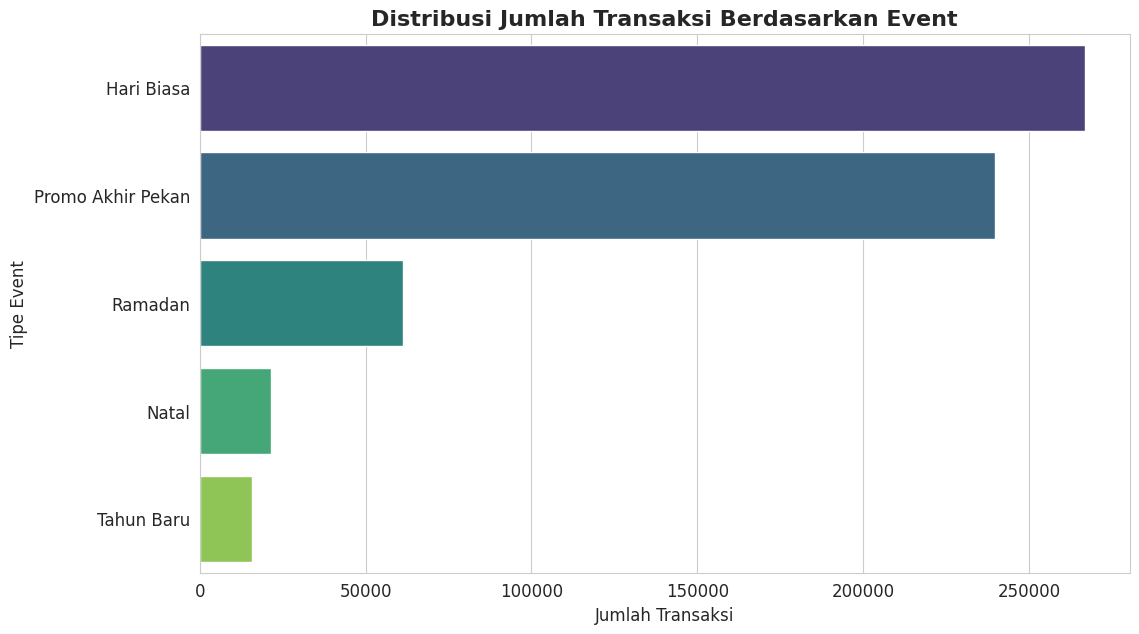


Membuat plot volume transaksi per minggu...


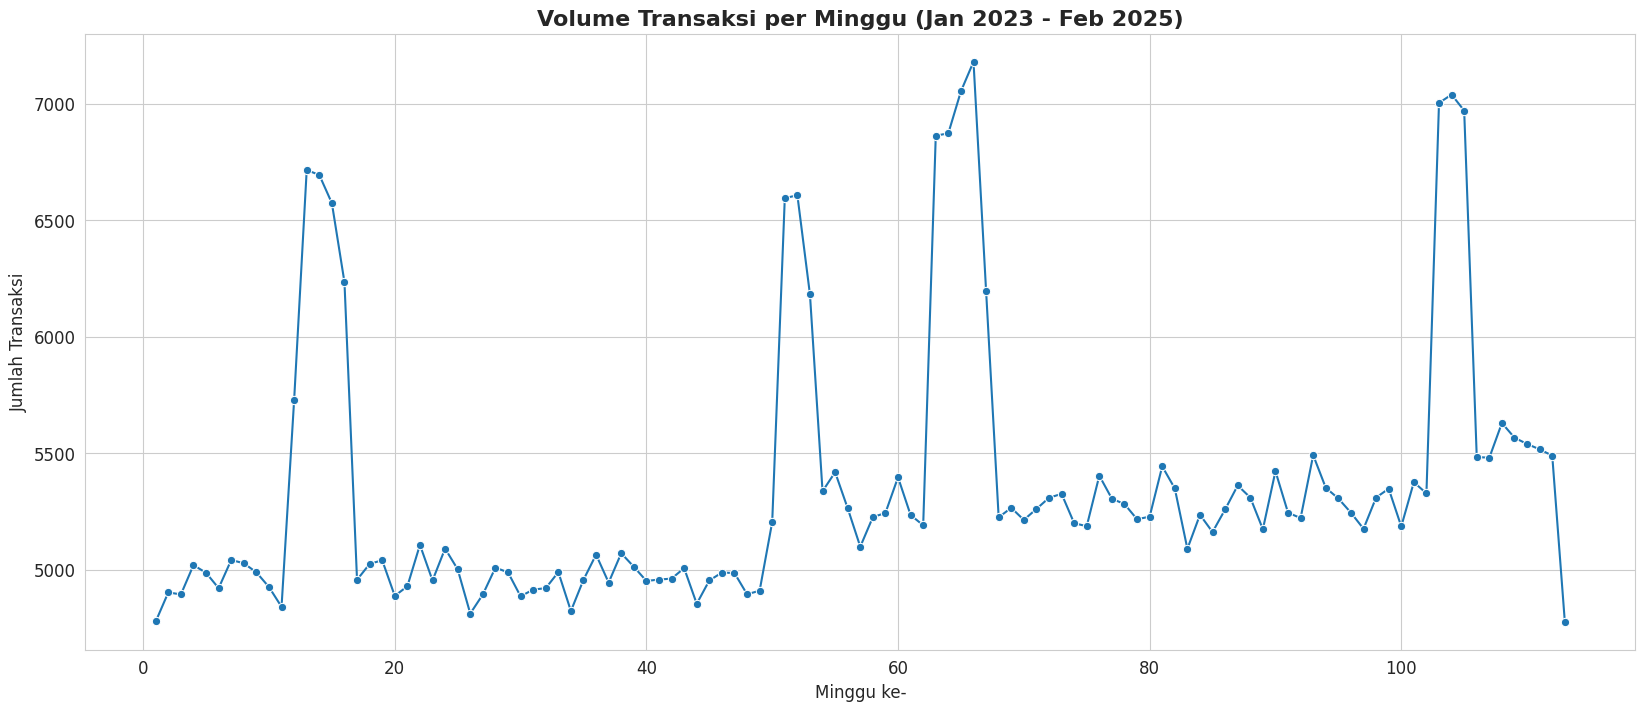

Perhatikan lonjakan pada periode event dan kenaikan volume saat toko baru dibuka (sekitar minggu ke-52).


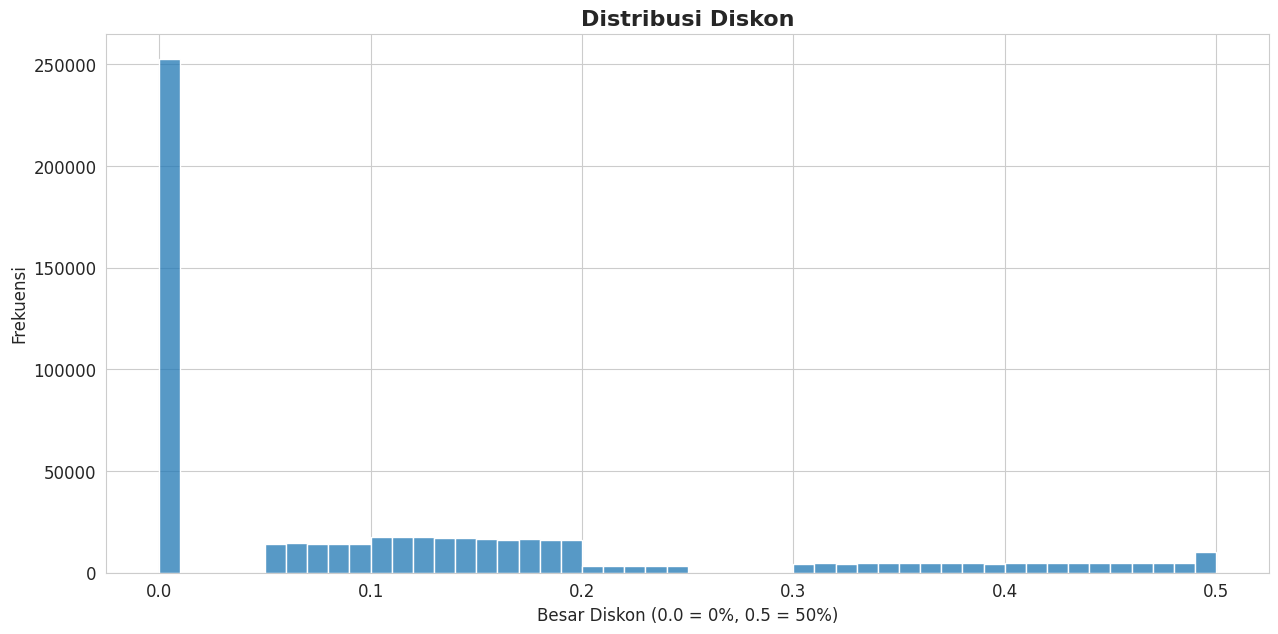

Perhatikan tumpukan besar di angka 0 (tanpa diskon), lalu di rentang 0.05-0.25 (promo), dan 0.3-0.5 (kedaluwarsa).


/tmp/ipython-input-2608497228.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




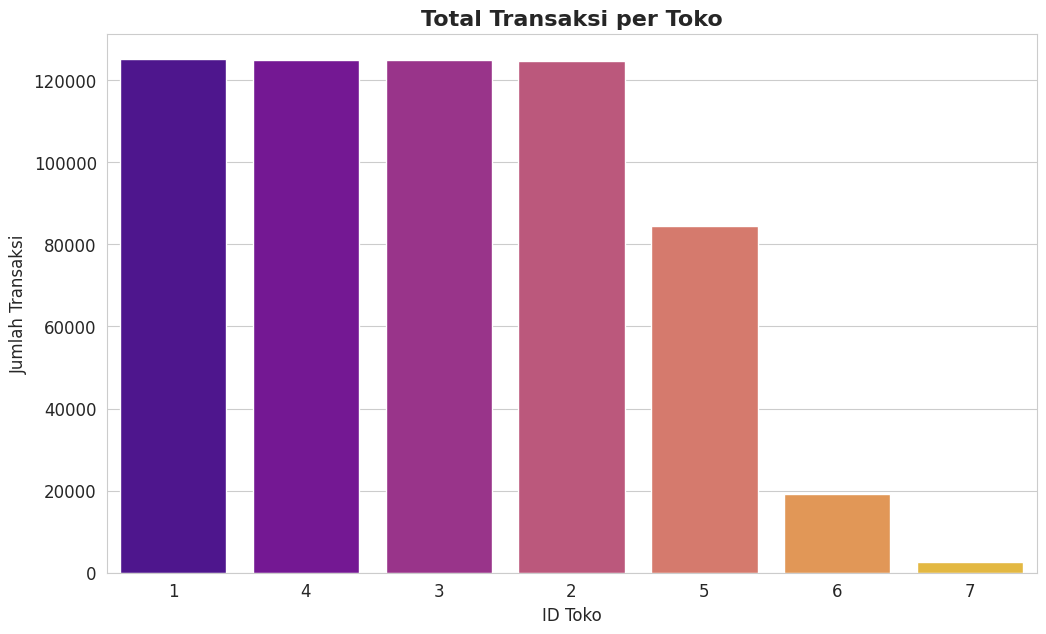

Toko 6 dan 7 memiliki bar yang lebih pendek karena baru buka pada tahun 2024 dan 2025.

Membandingkan RATA-RATA PENJUALAN HARIAN kategori saat Ramadan dan Non-Ramadan...
Jumlah hari dalam periode Ramadan: 63
Jumlah hari dalam periode Non-Ramadan: 727


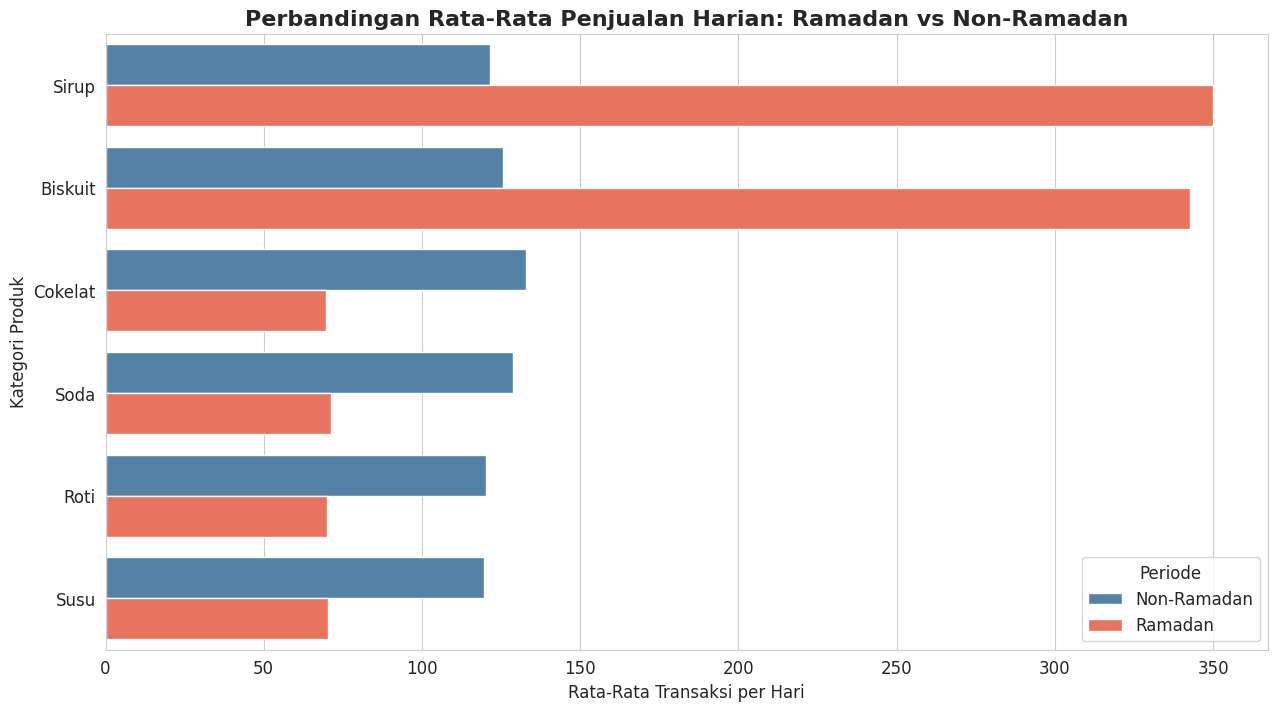


Grafik ini menunjukkan perbandingan yang adil.
Perhatikan bagaimana bar 'Ramadan' untuk 'Sirup' dan 'Biskuit' kini terlihat jauh lebih tinggi,
menandakan lonjakan permintaan harian yang signifikan selama periode tersebut.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Ubah kolom tanggal ke tipe datetime
df_transaksi['tanggal_transaksi'] = pd.to_datetime(df_transaksi['tanggal_transaksi'])

print(f"Total {len(df_transaksi)} baris data transaksi berhasil digabungkan.")
print("\n--- Ringkasan Data ---")
df_transaksi.info()


# --- Visualisasi untuk Validasi Aturan ---

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

# 1. Validasi Distribusi Event (Termasuk 'None')
plt.figure(figsize=(12, 7))
ax = sns.countplot(y=df_transaksi['current_event'], order=df_transaksi['current_event'].fillna('None').value_counts().index, palette='viridis')
ax.set_title('Distribusi Jumlah Transaksi Berdasarkan Event', fontsize=16, fontweight='bold')
ax.set_xlabel('Jumlah Transaksi', fontsize=12)
ax.set_ylabel('Tipe Event', fontsize=12)
plt.show()


# 2. Validasi Volume Transaksi Seiring Waktu
print("\nMembuat plot volume transaksi per minggu...")
transaksi_per_minggu = df_transaksi.groupby('minggu').size().reset_index(name='jumlah_transaksi')
plt.figure(figsize=(20, 8))
sns.lineplot(x='minggu', y='jumlah_transaksi', data=transaksi_per_minggu, marker='o')
plt.title('Volume Transaksi per Minggu (Jan 2023 - Feb 2025)', fontsize=16, fontweight='bold')
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.show()
print("Perhatikan lonjakan pada periode event dan kenaikan volume saat toko baru dibuka (sekitar minggu ke-52).")


# 3. Validasi Logika Diskon
plt.figure(figsize=(15, 7))
sns.histplot(df_transaksi['diskon'], bins=50, kde=False)
plt.title('Distribusi Diskon', fontsize=16, fontweight='bold')
plt.xlabel('Besar Diskon (0.0 = 0%, 0.5 = 50%)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()
print("Perhatikan tumpukan besar di angka 0 (tanpa diskon), lalu di rentang 0.05-0.25 (promo), dan 0.3-0.5 (kedaluwarsa).")


# 4. Validasi Penjualan per Toko
plt.figure(figsize=(12, 7))
ax = sns.countplot(x=df_transaksi['id_toko'], order=df_transaksi['id_toko'].value_counts().index, palette='plasma')
ax.set_title('Total Transaksi per Toko', fontsize=16, fontweight='bold')
ax.set_xlabel('ID Toko', fontsize=12)
ax.set_ylabel('Jumlah Transaksi', fontsize=12)
plt.show()
print("Toko 6 dan 7 memiliki bar yang lebih pendek karena baru buka pada tahun 2024 dan 2025.")

#  5. Validasi Penjualan Kategori saat Ramadan
print("\nMembandingkan RATA-RATA PENJUALAN HARIAN kategori saat Ramadan dan Non-Ramadan...")


# Gabungkan data transaksi dengan data produk untuk mendapatkan info kategori
df_merged = pd.merge(df_transaksi, produk_df[['id_produk', 'kategori_produk']], on='id_produk', how='left')

# Buat kolom penanda periode Ramadan (True/False)
df_merged['periode'] = df_merged['current_event'].apply(lambda x: 'Ramadan' if x == 'Ramadan' else 'Non-Ramadan')

# Hitung jumlah hari unik untuk setiap periode
hari_unik = df_merged.groupby('periode')['tanggal_transaksi'].nunique()
hari_ramadan = hari_unik.get('Ramadan', 1) # Ambil jumlah hari, default 1 untuk hindari error pembagian nol
hari_non_ramadan = hari_unik.get('Non-Ramadan', 1)

print(f"Jumlah hari dalam periode Ramadan: {hari_ramadan}")
print(f"Jumlah hari dalam periode Non-Ramadan: {hari_non_ramadan}")

# Hitung total transaksi per kategori untuk setiap periode
penjualan_per_periode = df_merged.groupby(['kategori_produk', 'periode']).size().reset_index(name='jumlah_transaksi')

# Hitung RATA-RATA PENJUALAN HARIAN
def hitung_rata_rata_harian(row):
    if row['periode'] == 'Ramadan':
        return row['jumlah_transaksi'] / hari_ramadan
    else:
        return row['jumlah_transaksi'] / hari_non_ramadan

penjualan_per_periode['rata_rata_harian'] = penjualan_per_periode.apply(hitung_rata_rata_harian, axis=1)

# Membuat visualisasi
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=penjualan_per_periode,
    y='kategori_produk',
    x='rata_rata_harian',
    hue='periode',
    order=penjualan_per_periode.groupby('kategori_produk')['rata_rata_harian'].sum().sort_values(ascending=False).index,
    palette={'Ramadan': '#ff6347', 'Non-Ramadan': '#4682b4'}
)

ax.set_title('Perbandingan Rata-Rata Penjualan Harian: Ramadan vs Non-Ramadan', fontsize=16, fontweight='bold')
ax.set_xlabel('Rata-Rata Transaksi per Hari', fontsize=12)
ax.set_ylabel('Kategori Produk', fontsize=12)
ax.legend(title='Periode')
plt.show()

print("\nGrafik ini menunjukkan perbandingan yang adil.")
print("Perhatikan bagaimana bar 'Ramadan' untuk 'Sirup' dan 'Biskuit' kini terlihat jauh lebih tinggi,")
print("menandakan lonjakan permintaan harian yang signifikan selama periode tersebut.")

## Model Penentu Barang

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
# Data
df_produk = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v3.csv')
df_toko = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/toko.csv')
df_transaksi = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/transaksi_v3.csv')


In [ ]:
# 2.1. Konversi Tipe Data & Tentukan Tanggal Referensi
# Untuk konsistensi, kita anggap 'hari ini' adalah satu hari setelah transaksi terakhir di dataset
df_produk['expire_date'] = pd.to_datetime(df_produk['expire_date'])
df_transaksi['tanggal_transaksi'] = pd.to_datetime(df_transaksi['tanggal_transaksi'])
HARI_INI = df_transaksi['tanggal_transaksi'].max() + pd.Timedelta(days=1)
print(f"Tanggal referensi (HARI_INI) ditetapkan pada: {HARI_INI.date()}")

# 2.2. Membuat Fitur Agregat dari Tabel Transaksi
# Kita hitung metrik penjualan untuk setiap produk
print("\nMenghitung fitur agregat dari transaksi...")
agg_transaksi = df_transaksi.groupby('id_produk').agg(
    total_penjualan=('id_produk', 'count'),
    penjualan_terakhir=('tanggal_transaksi', 'max'),
    jumlah_hari_jual=('tanggal_transaksi', 'nunique')
).reset_index()

# Hitung penjualan harian rata-rata
# Tambah 1 untuk menghindari pembagian dengan nol
agg_transaksi['penjualan_harian_avg'] = agg_transaksi['total_penjualan'] / (agg_transaksi['jumlah_hari_jual'] + 1)
agg_transaksi['hari_sejak_penjualan_terakhir'] = (HARI_INI - agg_transaksi['penjualan_terakhir']).dt.days

print("Fitur agregat berhasil dibuat.")
display(agg_transaksi.head())


# 2.3. Membuat Fitur dari Tabel Produk & Menggabungkan Data
print("\nMenggabungkan semua data menjadi satu DataFrame...")
# Mulai dengan df_produk sebagai basis
df_model = df_produk.copy()

# Gabungkan dengan fitur agregat transaksi
df_model = pd.merge(df_model, agg_transaksi[['id_produk', 'penjualan_harian_avg', 'hari_sejak_penjualan_terakhir']], on='id_produk', how='left')

# Isi nilai NaN untuk produk yang mungkin belum pernah terjual
df_model['penjualan_harian_avg'].fillna(0, inplace=True)
# Jika belum pernah terjual, kita anggap sudah sangat lama
df_model['hari_sejak_penjualan_terakhir'].fillna(999, inplace=True)


# Buat fitur utama yang akan kita gunakan
df_model['hari_menuju_kedaluwarsa'] = (df_model['expire_date'] - HARI_INI).dt.days
# Fitur 'margin_headroom' mengukur seberapa banyak ruang yang kita miliki untuk diskon
# Kita asumsikan minimal_margin ada di data produk atau bisa di-join dari tabel kategori
# Untuk contoh ini, kita buat nilai dummy
df_model['minimal_margin'] = df_model['margin'] * 0.4 # Contoh: minimal margin adalah 40% dari margin saat ini
df_model['margin_headroom'] = df_model['margin'] - df_model['minimal_margin']

# Pilih fitur-fitur numerik yang relevan untuk model
fitur_model = [
    'margin',
    'hari_jual_minimal',
    'penjualan_harian_avg',
    'hari_sejak_penjualan_terakhir',
    'hari_menuju_kedaluwarsa',
    'margin_headroom'
]

# Tampilkan hasil akhir dari data yang siap dimodelkan
print("\nData akhir yang siap untuk pemodelan:")
display(df_model[['id_produk', 'nama_produk'] + fitur_model].head())

Tanggal referensi (HARI_INI) ditetapkan pada: 2025-03-01

Menghitung fitur agregat dari transaksi...
Fitur agregat berhasil dibuat.


id_produk  total_penjualan penjualan_terakhir  jumlah_hari_jual  \
0  P0000001               18         2025-02-22                17   
1  P0000002               15         2024-10-06                15   
2  P0000003               11         2025-01-19                11   
3  P0000004               19         2025-01-21                18   
4  P0000005               13         2024-12-30                13   

   penjualan_harian_avg  hari_sejak_penjualan_terakhir  
0              1.000000                              7  
1              0.937500                            146  
2              0.916667                             41  
3              1.000000                             39  
4              0.928571                             61


Menggabungkan semua data menjadi satu DataFrame...

Data akhir yang siap untuk pemodelan:


/tmp/ipython-input-3387686918.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['penjualan_harian_avg'].fillna(0, inplace=True)
/tmp/ipython-input-3387686918.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

id_produk                       nama_produk  margin  hari_jual_minimal  \
0  P0000001         My Roti Roti Srikaya 350g  0.2005                  2   
1  P0000002         Pepsi Soda Original 500ml  0.1585                  7   
2  P0000003         Tango Biskuit Cokelat 50g  0.2241                 14   
3  P0000004      Frisian Flag Susu Moka 125ml  0.2286                  5   
4  P0000005  Delfi Cokelat Dark Chocolate 65g  0.1678                 20   

   penjualan_harian_avg  hari_sejak_penjualan_terakhir  \
0              1.000000                            7.0   
1              0.937500                          146.0   
2              0.916667                           41.0   
3              1.000000                           39.0   
4              0.928571                           61.0   

   hari_menuju_kedaluwarsa  margin_headroom  
0                      173          0.12030  
1                      530          0.09510  
2                      356          0.13446  
3                      409          0.13716  
4                      529          0.10068

In [ ]:
# ==============================================================================
# LANGKAH 3 (REVISI BESAR): Membuat Label Skor Urgensi Kontinu
# ==============================================================================
print("Membuat label 'urgency_score' yang lebih bernuansa...")

# Tentukan bobot bisnis (bisa disesuaikan)
W_KEDALUWARSA = 0.6  # Paling penting
W_KELAMBATAN = 0.3  # Cukup penting
W_PENJUALAN = 0.1   # Sebagai penalti

# Hindari pembagian dengan nol atau nilai negatif untuk hari menuju kedaluwarsa
# Kita batasi nilai minimumnya menjadi 1
df_model['hari_menuju_kedaluwarsa_safe'] = df_model['hari_menuju_kedaluwarsa'].clip(lower=1)

# Hitung komponen skor
# Skor kedaluwarsa (semakin kecil harinya, semakin besar skornya, non-linear)
df_model['skor_kedaluwarsa'] = 1 / df_model['hari_menuju_kedaluwarsa_safe']

# Skor kelambatan (semakin lama tidak laku, semakin tinggi skornya)
df_model['skor_kelambatan'] = df_model['hari_sejak_penjualan_terakhir']

# Skor penalti penjualan (semakin laku, semakin tinggi penaltinya)
df_model['skor_penalti_penjualan'] = df_model['penjualan_harian_avg']

# Gabungkan menjadi skor urgensi mentah
df_model['urgency_score_raw'] = (W_KEDALUWARSA * df_model['skor_kedaluwarsa'] +
                                 W_KELAMBATAN * df_model['skor_kelambatan'] -
                                 W_PENJUALAN * df_model['skor_penalti_penjualan'])

# Normalisasi skor mentah ke rentang 0-100 agar lebih mudah diinterpretasikan
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
df_model['urgency_score'] = scaler.fit_transform(df_model[['urgency_score_raw']])

print("Distribusi 'urgency_score' yang baru:")
print(df_model['urgency_score'].describe())


# ==============================================================================
# LANGKAH 4 & 5 (REVISI BESAR): Melatih Model Regresi untuk Memprediksi Skor
# ==============================================================================
# Karena target kita sekarang kontinu, kita gunakan LGBMRegressor.
# Tujuannya adalah melatih model yang bisa memprediksi 'urgency_score' untuk produk baru
# atau saat data diperbarui.

# Definisikan fitur (X) dan target (y) BARU kita
X = df_model[fitur_model]  # Fitur tetap sama
y = df_model['urgency_score']   # Target sekarang adalah skor kontinu

# Bagi data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData dibagi menjadi {len(X_train)} baris training dan {len(X_test)} baris testing.")

# Inisialisasi model REGRESI
regressor = lgb.LGBMRegressor(
    objective='regression_l1',  # L1 (MAE) loss, lebih tahan terhadap outlier
    metric='mae',
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    num_leaves=31
)

print("\nMemulai pelatihan model LGBMRegressor...")
regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='mae',
    callbacks=[lgb.early_stopping(20, verbose=False)]
)
print("Pelatihan model regresi selesai.")

# ==============================================================================
# LANGKAH 6 (REVISI BESAR): Membuat Peringkat Berdasarkan Prediksi Skor
# ==============================================================================
print("\nMemprediksi skor urgensi untuk semua produk...")

# Gunakan model regresi untuk memprediksi skor pada keseluruhan dataset
df_model['skor_prediksi'] = regressor.predict(X)

# Buat DataFrame hasil
df_hasil_peringkat_baru = df_model[[
    'id_produk', 'nama_produk', 'kategori_produk', 'skor_prediksi',
    'hari_menuju_kedaluwarsa', 'hari_sejak_penjualan_terakhir'
]].copy()

# Urutkan berdasarkan SKOR PREDIKSI dari yang tertinggi ke terendah
df_hasil_peringkat_baru = df_hasil_peringkat_baru.sort_values(by='skor_prediksi', ascending=False)

print("\n\n--- HASIL AKHIR (VERSI BARU): TOP 20 PRODUK KANDIDAT UNTUK DISKON ---")
display(df_hasil_peringkat_baru.head(20))

print("\nContoh sebaran skor prediksi yang unik:")
print(np.unique(df_hasil_peringkat_baru['skor_prediksi'].round(2)))

Membuat label 'urgency_score' yang lebih bernuansa...
Distribusi 'urgency_score' yang baru:
count    89898.000000
mean        29.578523
std         38.832976
min          0.000000
25%          3.411785
50%          8.923754
75%         33.659349
max        100.000000
Name: urgency_score, dtype: float64

Data dibagi menjadi 71918 baris training dan 17980 baris testing.

Memulai pelatihan model LGBMRegressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 71918, number of used features: 6
[LightGBM] [Info] Start training from score 8.920397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

id_produk                  nama_produk kategori_produk  skor_prediksi  \
89855  P0089856    Sari Roti Roti Tawar 200g            Roti      99.999992   
89893  P0089894  Sari Roti Roti Srikaya 350g            Roti      99.999992   
80129  P0080130     My Roti Roti Srikaya 70g            Roti      99.999992   
84374  P0084375   Sari Roti Roti Pandan 350g            Roti      99.999992   
74151  P0074152       My Roti Roti Keju 200g            Roti      99.999992   
84334  P0084335   Mr. Bread Roti Pandan 200g            Roti      99.999992   
89797  P0089798     Sari Roti Roti Keju 200g            Roti      99.999992   
89828  P0089829     My Roti Roti Pandan 350g            Roti      99.999992   
56662  P0056663   Mr. Bread Roti Pandan 350g            Roti      99.999992   
74209  P0074210           Aoka Roti Keju 70g            Roti      99.999992   
74211  P0074212     My Roti Roti Pandan 350g            Roti      99.999992   
74244  P0074245          Aoka Roti Tawar 70g            Roti      99.999992   
84405  P0084406      My Roti Roti Pandan 70g            Roti      99.999992   
74082  P0074083    My Roti Roti Srikaya 200g            Roti      99.999992   
84277  P0084278     Sari Roti Roti Keju 200g            Roti      99.999992   
74063  P0074064    Mr. Bread Roti Pandan 70g            Roti      99.999992   
84457  P0084458       Aoka Roti Cokelat 350g            Roti      99.999992   
84459  P0084460       My Roti Roti Keju 350g            Roti      99.999992   
74329  P0074330     My Roti Roti Srikaya 70g            Roti      99.999992   
84251  P0084252   Sari Roti Roti Srikaya 70g            Roti      99.999992   

       hari_menuju_kedaluwarsa  hari_sejak_penjualan_terakhir  
89855                      171                          999.0  
89893                      171                          999.0  
80129                      171                          999.0  
84374                      171                          999.0  
74151                      172                          999.0  
84334                      171                          999.0  
89797                      171                          999.0  
89828                      172                          999.0  
56662                      171                          999.0  
74209                      172                          999.0  
74211                      172                          999.0  
74244                      172                          999.0  
84405                      171                          999.0  
74082                      172                          999.0  
84277                      171                          999.0  
74063                      171                          999.0  
84457                      172                          999.0  
84459                      171                          999.0  
74329                      172                          999.0  
84251                      171                          999.0


Contoh sebaran skor prediksi yang unik:
[0.000e+00 1.000e-02 2.000e-02 ... 6.263e+01 6.264e+01 1.000e+02]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy

# Asumsikan df_hasil_peringkat_baru sudah berisi skor prediksi

# --- LANGKAH 1: Tentukan Parameter ---
TOTAL_SLOT_PROMOSI = 1000
SKOR_THRESHOLD = 50 # Angka ini bisa disesuaikan

# --- LANGKAH 2: Hitung Kandidat per Kategori ---
# Tandai produk mana yang dianggap 'kandidat kuat'
df_hasil_peringkat_baru['is_candidate'] = df_hasil_peringkat_baru['skor_prediksi'] > SKOR_THRESHOLD

# Hitung jumlah kandidat per kategori
candidate_counts = df_hasil_peringkat_baru[df_hasil_peringkat_baru['is_candidate']].groupby('kategori_produk').size()
total_candidates = candidate_counts.sum()

print("Jumlah kandidat kuat (skor > 50) per kategori:")
print(candidate_counts)

# --- LANGKAH 3: Hitung dan Alokasikan Kuota Dinamis ---
# Hitung kuota mentah berdasarkan proporsi
raw_quotas = (candidate_counts / total_candidates) * TOTAL_SLOT_PROMOSI

# Bulatkan kuota dan pastikan jumlahnya tepat 30 (logika pembulatan sederhana)
# Kita bulatkan ke bawah, lalu sisa slotnya kita berikan satu per satu ke kategori dengan desimal terbesar
quotas = np.floor(raw_quotas).astype(int) # Menggunakan np.floor()
sisa_slot = TOTAL_SLOT_PROMOSI - quotas.sum()

# Berikan sisa slot ke kategori dengan sisa desimal terbesar
sisa_desimal = raw_quotas - quotas
# Sort sisa desimal dari terbesar ke terkecil dan ambil indexnya
top_sisa_cats = sisa_desimal.sort_values(ascending=False).index.tolist()

# Alokasikan sisa slot
for cat in top_sisa_cats:
    if sisa_slot <= 0:
        break
    quotas[cat] += 1
    sisa_slot -= 1

# Pastikan setiap kategori yang punya kandidat dapat minimal 1 slot (opsional, tergantung aturan bisnis)
# Jika ada kategori dengan kandidat tapi kuota 0, alokasikan 1 (ambil dari kuota terbesar jika perlu)
# Untuk saat ini, kita biarkan bisa 0 jika proporsinya sangat kecil

print("\nKuota Dinamis yang Dialokasikan:")
print(quotas)

# --- LANGKAH 4: Ambil Produk Berdasarkan Kuota Dinamis ---
list_of_dfs = []
for category, num_to_take in quotas.items():
    if num_to_take > 0: # Hanya ambil jika kuotanya lebih dari 0
        # Ambil 'num_to_take' produk teratas dari kategori tersebut
        top_products_per_cat = (
            df_hasil_peringkat_baru[df_hasil_peringkat_baru['kategori_produk'] == category]
            .sort_values(by='skor_prediksi', ascending=False) # Pastikan diurutkan berdasarkan skor prediksi
            .head(num_to_take)
        )
        list_of_dfs.append(top_products_per_cat)

# Gabungkan semua hasilnya menjadi satu DataFrame
if list_of_dfs: # Cek apakah list tidak kosong sebelum concat
    df_final_dinamis = pd.concat(list_of_dfs)
else:
    df_final_dinamis = pd.DataFrame() # Buat DataFrame kosong jika tidak ada produk yang dipilih


# Urutkan hasil akhir berdasarkan skor
df_final_dinamis = df_final_dinamis.sort_values(by='skor_prediksi', ascending=False)

print(f"\n--- DAFTAR FINAL {len(df_final_dinamis)} PRODUK DENGAN KUOTA DINAMIS ---")
display(df_final_dinamis)

Jumlah kandidat kuat (skor > 50) per kategori:
kategori_produk
Biskuit    3154
Cokelat    3312
Roti       3531
Sirup      3396
Soda       3428
Susu       3530
dtype: int64

Kuota Dinamis yang Dialokasikan:
kategori_produk
Biskuit    155
Cokelat    163
Roti       174
Sirup      167
Soda       168
Susu       173
dtype: int64

--- DAFTAR FINAL 1000 PRODUK DENGAN KUOTA DINAMIS ---


id_produk                  nama_produk kategori_produk  skor_prediksi  \
57712  P0057713     Sari Roti Roti Tawar 70g            Roti      99.999992   
83726  P0083727    My Roti Roti Srikaya 350g            Roti      99.999992   
75083  P0075084       Aoka Roti Srikaya 350g            Roti      99.999992   
75088  P0075089   Mr. Bread Roti Pandan 350g            Roti      99.999992   
75101  P0075102   Sari Roti Roti Pandan 350g            Roti      99.999992   
...         ...                          ...             ...            ...   
69631  P0069632  Tjap Buah Sirup Mawar 500ml           Sirup      99.999191   
75187  P0075188     Marjan Sirup Melon 460ml           Sirup      99.999191   
75738  P0075739  Tjap Buah Sirup Jeruk 600ml           Sirup      99.999191   
85239  P0085240     Marjan Sirup Melon 500ml           Sirup      99.999191   
72031  P0072032        ABC Sirup Jeruk 460ml           Sirup      99.999191   

       hari_menuju_kedaluwarsa  hari_sejak_penjualan_terakhir  is_candidate  
57712                      172                          999.0          True  
83726                      171                          999.0          True  
75083                      171                          999.0          True  
75088                      171                          999.0          True  
75101                      172                          999.0          True  
...                        ...                            ...           ...  
69631                      550                          999.0          True  
75187                      556                          999.0          True  
75738                      554                          999.0          True  
85239                      553                          999.0          True  
72031                      557                          999.0          True  

[1000 rows x 7 columns]

## Model Penentu Diskon

In [ ]:
# Muat semua data yang dibutuhkan
df_transaksi = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/transaksi_v3.csv')
df_produk = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v3.csv')
df_toko = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/toko.csv')
df_top_30_rekomendasi = df_final_dinamis.copy()

In [ ]:
import pandas as pd
import numpy as np

print("--- Langkah 1: Membuat df_master_train (Menggabungkan data historis) ---")

# Menyeragamkan tipe data kunci untuk memastikan merge berhasil
df_transaksi['id_produk'] = df_transaksi['id_produk'].astype(str)
df_produk['id_produk'] = df_produk['id_produk'].astype(str)
df_toko['id_toko'] = df_toko['id_toko'].astype(int)
df_transaksi['id_toko'] = df_transaksi['id_toko'].astype(int)

# Gabungkan transaksi dengan data produk (menghapus kolom duplikat `id_toko` dari produk)
print("   - Menggabungkan transaksi dengan produk...")
if 'id_toko' in df_produk.columns:
    df_produk_cleaned = df_produk.drop(columns=['id_toko'])
else:
    df_produk_cleaned = df_produk
df_master_train = pd.merge(df_transaksi, df_produk_cleaned, on='id_produk', how='left')

# Gabungkan dengan data toko
print("   - Menggabungkan dengan data toko...")
df_master_train = pd.merge(df_master_train, df_toko, on='id_toko', how='left')

print("\n'df_master_train' (buku pelajaran untuk model) berhasil dibuat!")
print("Shape:", df_master_train.shape)
display(df_master_train.head())

--- Langkah 1: Membuat df_master_train (Menggabungkan data historis) ---
   - Menggabungkan transaksi dengan produk...
   - Menggabungkan dengan data toko...

'df_master_train' (buku pelajaran untuk model) berhasil dibuat!
Shape: (605518, 38)


id_produk  minggu tanggal_transaksi      current_event  id_toko  \
0  P0006681       1        2023-01-01  Promo Akhir Pekan        1   
1  P0005521       1        2023-01-01  Promo Akhir Pekan        1   
2  P0001920       1        2023-01-01  Promo Akhir Pekan        1   
3  P0002373       1        2023-01-01  Promo Akhir Pekan        1   
4  P0009121       1        2023-01-01  Promo Akhir Pekan        1   

   harga_promosi  diskon               tipe_diskon  margin_promosi  hari_jual  \
0           5200  0.1215  Generic Product Discount          0.0769        164   
1          13900  0.1852  Generic Product Discount          0.0072        103   
2          49900  0.1563  Generic Product Discount          0.0762        114   
3          11500  0.0675  Generic Product Discount          0.0696         20   
4           9700  0.0883  Generic Product Discount          0.1134        108   

   ...  jumlah_karyawan        tipe  \
0  ...                4  permukiman   
1  ...                4  permukiman   
2  ...                4  permukiman   
3  ...                4  permukiman   
4  ...                4  permukiman   

                                       umur_konsumen  \
0  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
1  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
2  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
3  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
4  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   

             jenis_kelamin_konsumen  \
0  perempuan: 0.60, laki-laki: 0.40   
1  perempuan: 0.60, laki-laki: 0.40   
2  perempuan: 0.60, laki-laki: 0.40   
3  perempuan: 0.60, laki-laki: 0.40   
4  perempuan: 0.60, laki-laki: 0.40   

                       penghasilan_konsumen_avg  \
0  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
1  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
2  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
3  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
4  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   

                                  pekerjaan_konsumen  \
0  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
1  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
2  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
3  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
4  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   

                kebiasaan_konsumen  \
0  impulsif: 0.40, terencana: 0.60   
1  impulsif: 0.40, terencana: 0.60   
2  impulsif: 0.40, terencana: 0.60   
3  impulsif: 0.40, terencana: 0.60   
4  impulsif: 0.40, terencana: 0.60   

                                        reaksi_promo  \
0  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
1  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
2  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
3  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
4  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   

                          frekuensi_pembelian  \
0  sering: 0.40, sesekali: 0.50, jarang: 0.10   
1  sering: 0.40, sesekali: 0.50, jarang: 0.10   
2  sering: 0.40, sesekali: 0.50, jarang: 0.10   
3  sering: 0.40, sesekali: 0.50, jarang: 0.10   
4  sering: 0.40, sesekali: 0.50, jarang: 0.10   

                                    waktu_pembelian  
0  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
1  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
2  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
3  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
4  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  

[5 rows x 38 columns]

In [ ]:
print("\n--- Langkah 2: Mendefinisikan 'outcome' (profit_transaksi) ---")

df_master_train['profit_transaksi'] = df_master_train['harga_promosi'] - df_master_train['harga_beli']

print("Kolom 'profit_transaksi' berhasil dibuat di df_master_train.")


--- Langkah 2: Mendefinisikan 'outcome' (profit_transaksi) ---
Kolom 'profit_transaksi' berhasil dibuat di df_master_train.


In [ ]:
print("\n--- Langkah 3: Feature Engineering pada Data Latihan ---")

# 3a. Parsing Fitur Konteks Toko
print("   - Mengekstrak fitur dari kolom Toko...")
try:
    df_master_train['rasio_pekerja_kantoran'] = df_master_train['pekerjaan_konsumen'].str.extract(r'pekerja_kantoran: (\d+\.\d+)').astype(float).fillna(0)
    df_master_train['rasio_impulsif'] = df_master_train['kebiasaan_konsumen'].str.extract(r'impulsif: (\d+\.\d+)').astype(float).fillna(0)
except Exception as e:
    print(f"   - Peringatan: Gagal mengekstrak fitur toko. Error: {e}")

# 3b. Membuat Fitur Baru dari Detail Produk
print("   - Membuat fitur 'gramasi' dan 'harga_per_gram'...")
df_master_train['gramasi'] = df_master_train['nama_produk'].str.extract(r'(\d+)\s?(g|ml)')[0].astype(float).fillna(0)
df_master_train['harga_per_gram'] = (df_master_train['harga_jual'] / df_master_train['gramasi']).replace([np.inf, -np.inf], 0).fillna(0)

# 3c. One-Hot Encoding Fitur Kategorikal
print("   - Melakukan One-Hot Encoding...")
df_master_train_featured = pd.get_dummies(df_master_train, columns=['brand', 'kategori_produk', 'current_event'], prefix=['brand', 'kat', 'event'])

print("Feature engineering pada data latihan selesai.")


--- Langkah 3: Feature Engineering pada Data Latihan ---
   - Mengekstrak fitur dari kolom Toko...
   - Membuat fitur 'gramasi' dan 'harga_per_gram'...
   - Melakukan One-Hot Encoding...
Feature engineering pada data latihan selesai.


In [ ]:
print("\n--- Langkah 4: Finalisasi dan Pemisahan Data Latihan ---")

# Definisikan semua nama kolom yang akan menjadi fitur (X)
fitur_numerik = [
    'harga_jual', 'margin', 'hari_jual', 'kedaluwarsa',
    'rasio_pekerja_kantoran', 'rasio_impulsif', 'gramasi', 'harga_per_gram'
]
fitur_ohe = [col for col in df_master_train_featured.columns if col.startswith(('brand_', 'kat_', 'event_'))]
feature_columns = fitur_numerik + fitur_ohe
print(f"   - Total {len(feature_columns)} fitur akan digunakan.")

# Pisahkan data menjadi beberapa bagian berdasarkan 'tipe_diskon'
dataframes_per_treatment = {}
for treatment_name in df_master_train_featured['tipe_diskon'].unique():
    dataframes_per_treatment[treatment_name] = df_master_train_featured[df_master_train_featured['tipe_diskon'] == treatment_name].copy()

print("\nData latihan telah dipisahkan per tipe diskon:")
for name, df in dataframes_per_treatment.items():
    print(f"- {name}: {len(df)} baris")


--- Langkah 4: Finalisasi dan Pemisahan Data Latihan ---
   - Total 47 fitur akan digunakan.

Data latihan telah dipisahkan per tipe diskon:
- Generic Product Discount: 180771 baris
- BOGO: 5708 baris
- Expired Discount: 91882 baris
- Tanpa Diskon: 231211 baris
- Discount Perkenalan: 4457 baris
- Event Based Discount: 91489 baris


In [ ]:
import lightgbm as lgb
print("\n--- Langkah 5: Melatih Model-model T-Learner ---")
trained_models = {}
for treatment_name, df_treatment in dataframes_per_treatment.items():
    print(f"--> Melatih model untuk: '{treatment_name}'")

    if len(df_treatment) < 100:
        print(f"    - Peringatan: Data terlalu sedikit, model untuk '{treatment_name}' dilewati.")
        continue

    X_train = df_treatment[feature_columns]
    y_train = df_treatment['profit_transaksi']

    model = lgb.LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)
    model.fit(X_train, y_train)

    trained_models[treatment_name] = model
    print(f"    - Model untuk '{treatment_name}' berhasil dilatih.")

print("\n=================================================")
print("  PROSES PELATIHAN MODEL SPESIALIS SELESAI  ")
print("=================================================")


--- Langkah 5: Melatih Model-model T-Learner ---
--> Melatih model untuk: 'Generic Product Discount'
    - Model untuk 'Generic Product Discount' berhasil dilatih.
--> Melatih model untuk: 'BOGO'
    - Model untuk 'BOGO' berhasil dilatih.
--> Melatih model untuk: 'Expired Discount'
    - Model untuk 'Expired Discount' berhasil dilatih.
--> Melatih model untuk: 'Tanpa Diskon'
    - Model untuk 'Tanpa Diskon' berhasil dilatih.
--> Melatih model untuk: 'Discount Perkenalan'
    - Model untuk 'Discount Perkenalan' berhasil dilatih.
--> Melatih model untuk: 'Event Based Discount'
    - Model untuk 'Event Based Discount' berhasil dilatih.

  PROSES PELATIHAN MODEL SPESIALIS SELESAI  


In [ ]:
print("--- Langkah 6: Menyiapkan Data untuk Diberi Rekomendasi (Versi Perbaikan) ---")

# Ambil daftar ID produk dari hasil Model 1
list_id_rekomendasi = df_top_30_rekomendasi['id_produk'].astype(str).unique().tolist()

# Mulai dengan DataFrame yang berisi produk-produk ini beserta detailnya dari df_produk
df_rekomendasi = df_produk[df_produk['id_produk'].isin(list_id_rekomendasi)].copy()

# Gabungkan dengan data toko
df_rekomendasi = pd.merge(df_rekomendasi, df_toko, on='id_toko', how='left')

print(f"   - Menyiapkan data untuk {len(df_rekomendasi)} kombinasi produk-toko...")

# ============================ SOLUSI DI SINI ============================
# [SOLUSI] Tambahkan kolom 'current_event' secara manual untuk simulasi.
# Kita asumsikan promosi akan dijalankan pada konteks 'Promo Akhir Pekan'.
df_rekomendasi['current_event'] = 'Promo Akhir Pekan'
print("   - Kolom 'current_event' ditambahkan dengan nilai 'Promo Akhir Pekan'.")
# =======================================================================


# Lakukan feature engineering yang SAMA PERSIS dengan Langkah 3
print("   - Menerapkan feature engineering...")

# 6a. Parsing Fitur Konteks Toko
try:
    df_rekomendasi['rasio_pekerja_kantoran'] = df_rekomendasi['pekerjaan_konsumen'].str.extract(r'pekerja_kantoran: (\d+\.\d+)').astype(float).fillna(0)
    df_rekomendasi['rasio_impulsif'] = df_rekomendasi['kebiasaan_konsumen'].str.extract(r'impulsif: (\d+\.\d+)').astype(float).fillna(0)
except Exception: pass

# 6b. Membuat Fitur Baru dari Detail Produk
df_rekomendasi['gramasi'] = df_rekomendasi['nama_produk'].str.extract(r'(\d+)\s?(g|ml)')[0].astype(float).fillna(0)
df_rekomendasi['harga_per_gram'] = (df_rekomendasi['harga_jual'] / df_rekomendasi['gramasi']).replace([np.inf, -np.inf], 0).fillna(0)
df_rekomendasi['hari_jual'] = df_rekomendasi['hari_jual_minimal']
df_rekomendasi['kedaluwarsa'] = 365 - df_rekomendasi['hari_jual_minimal']


# 6c. One-Hot Encoding (Sekarang akan berhasil)
df_rekomendasi_featured = pd.get_dummies(df_rekomendasi, columns=['brand', 'kategori_produk', 'current_event'], prefix=['brand', 'kat', 'event'])

# 6d. Finalisasi - Pastikan semua kolom ada dan urutannya sama
for col in feature_columns:
    if col not in df_rekomendasi_featured.columns:
        df_rekomendasi_featured[col] = 0
X_rekomendasi = df_rekomendasi_featured[feature_columns]

print("Data rekomendasi siap untuk diprediksi.")

--- Langkah 6: Menyiapkan Data untuk Diberi Rekomendasi (Versi Perbaikan) ---
   - Menyiapkan data untuk 1000 kombinasi produk-toko...
   - Kolom 'current_event' ditambahkan dengan nilai 'Promo Akhir Pekan'.
   - Menerapkan feature engineering...
Data rekomendasi siap untuk diprediksi.


In [ ]:
print("\n--- Langkah 7: Simulasi, Perhitungan Uplift, dan Rekomendasi Final (Versi Perbaikan) ---")

# ==============================================================================
# Tahap 1 & 2 (Tidak berubah)
# ==============================================================================
print("   - Tahap 1 & 2: Menyiapkan data dan melakukan prediksi...")
# (Kode dari langkah 6 untuk menyiapkan X_rekomendasi diasumsikan sudah berjalan)

hasil_prediksi = {}
for treatment_name, model in trained_models.items():
    prediksi = model.predict(X_rekomendasi)
    hasil_prediksi[treatment_name] = prediksi

df_prediksi_profit = pd.DataFrame(hasil_prediksi, index=df_rekomendasi.index)


# ==============================================================================
# Tahap 3: Hitung Uplift dan Tentukan Strategi Terbaik (Logika Diperbaiki)
# ==============================================================================
print("   - Tahap 3: Menghitung uplift dan memilih strategi terbaik...")

if 'Tanpa Diskon' in df_prediksi_profit.columns:
    baseline_profit = df_prediksi_profit['Tanpa Diskon']
    # df_uplift_numeric hanya berisi kolom-kolom uplift yang berupa angka
    df_uplift_numeric = df_prediksi_profit.drop(columns=['Tanpa Diskon'], errors='ignore').subtract(baseline_profit, axis=0)
else:
    print("   - Peringatan: Model 'Tanpa Diskon' tidak ditemukan.")
    df_uplift_numeric = df_prediksi_profit
    baseline_profit = 0

# [DIUBAH] Buat DataFrame hasil untuk menampung rekomendasi
df_hasil_rekomendasi = pd.DataFrame(index=df_uplift_numeric.index)

# [DIUBAH] 1. Cari nama strategi terbaik DULU (dari DataFrame angka)
df_hasil_rekomendasi['rekomendasi_strategi'] = df_uplift_numeric.idxmax(axis=1)

# [DIUBAH] 2. BARU ambil nilai uplift tertinggi
df_hasil_rekomendasi['estimasi_uplift_profit'] = df_uplift_numeric.max(axis=1)

# 3. Logika untuk menangani uplift negatif (tidak berubah)
df_hasil_rekomendasi.loc[df_hasil_rekomendasi['estimasi_uplift_profit'] < 0, 'rekomendasi_strategi'] = 'Tanpa Diskon'
df_hasil_rekomendasi.loc[df_hasil_rekomendasi['estimasi_uplift_profit'] < 0, 'estimasi_uplift_profit'] = 0


# ==============================================================================
# Tahap 4: Tampilkan Hasil Akhir (Tidak berubah)
# ==============================================================================
print("\n============================================================")
print("         HASIL AKHIR: REKOMENDASI STRATEGI DISKON           ")
print("============================================================")

df_final_recommendation = pd.concat([
    df_rekomendasi[['id_produk', 'nama_produk', 'kategori_produk', 'id_toko']].reset_index(drop=True),
    df_hasil_rekomendasi[['rekomendasi_strategi', 'estimasi_uplift_profit']].reset_index(drop=True)
], axis=1)

df_agg_recommendation = df_final_recommendation.groupby(['id_produk', 'nama_produk', 'kategori_produk']).agg(
    rekomendasi_utama=('rekomendasi_strategi', lambda x: x.mode()[0] if not x.empty else "N/A"),
    rata_rata_uplift_profit=('estimasi_uplift_profit', 'mean')
).reset_index().sort_values(by='rata_rata_uplift_profit', ascending=False)


display(df_agg_recommendation.head(30).style.format({'rata_rata_uplift_profit': 'Rp {:,.0f}'.format}).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))


--- Langkah 7: Simulasi, Perhitungan Uplift, dan Rekomendasi Final (Versi Perbaikan) ---
   - Tahap 1 & 2: Menyiapkan data dan melakukan prediksi...
   - Tahap 3: Menghitung uplift dan memilih strategi terbaik...

         HASIL AKHIR: REKOMENDASI STRATEGI DISKON           


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("\n--- MEMULAI PROSES PENGAYAAN REKOMENDASI (FINAL & SELARAS) ---")

# ==============================================================================
# LANGKAH 1: PERSIAPAN DATA & KONTEKS WAKTU
# ==============================================================================
# Gunakan df_agg_recommendation dari output T-Learner Anda sebagai dasar
df_final = df_agg_recommendation.copy()
print(f"   - Memulai dengan {len(df_final)} produk dari hasil T-Learner.")

# Gabungkan dengan df_produk untuk mendapatkan fitur yang dibutuhkan
df_final['id_produk'] = df_final['id_produk'].astype(str)
df_produk['id_produk'] = df_produk['id_produk'].astype(str)
fitur_tambahan = ['id_produk', 'harga_jual', 'harga_kompetitor', 'produk_musiman', 'hari_jual_minimal', 'expire_date']
df_final = pd.merge(df_final, df_produk[fitur_tambahan], on='id_produk', how='left')

# Siapkan konteks waktu
HARI_INI = pd.to_datetime(df_transaksi['tanggal_transaksi']).max() + pd.Timedelta(days=1)
df_final['expire_date'] = pd.to_datetime(df_final['expire_date'])
df_final['hari_menuju_kedaluwarsa'] = (df_final['expire_date'] - HARI_INI).dt.days
events_calendar = {"Ramadan": (pd.Timestamp("2025-02-28"), pd.Timestamp("2025-03-29")), "Natal": (pd.Timestamp("2025-12-15"), pd.Timestamp("2025-12-25"))}
upcoming_events = {event: dates for event, dates in events_calendar.items() if dates[0] < HARI_INI + pd.Timedelta(days=90)}
print(f"   - Konteks waktu disiapkan. Event mendatang: {list(upcoming_events.keys())}")


# ==============================================================================
# LANGKAH 2: DEFINISIKAN & JALANKAN MESIN ATURAN UNTUK BESARAN DISKON
# ==============================================================================
print("\n--- LANGKAH 2: Menjalankan Mesin Aturan untuk Menghitung Besaran Diskon ---")
def round_discount(diskon):
    if diskon is None or diskon < 0.05: return 0.05
    return round((diskon * 100) / 5) * 5 / 100

def get_recommendation_magnitude(row, upcoming_events):
    strategi = row['rekomendasi_utama']
    kategori, kedaluwarsa = row['kategori_produk'], row['hari_menuju_kedaluwarsa']
    harga_kita, harga_kompetitor = row['harga_jual'], row['harga_kompetitor']
    hari_jual_min = row['hari_jual_minimal']
    if strategi == 'BOGO': return 0.50
    if strategi == 'Tanpa Diskon': return 0.0
    if 'Expired' in strategi:
        if harga_kita > 0 and pd.notna(harga_kompetitor) and harga_kompetitor > 0:
            harga_target = harga_kompetitor * 0.95
            calc_besaran = 1 - (harga_target / harga_kita)
            return round_discount(max(0.05, calc_besaran))
        else: return 0.25
    if 'Event' in strategi:
        if harga_kita > 0 and pd.notna(harga_kompetitor) and harga_kompetitor > 0:
            harga_target = harga_kompetitor * 0.98
            calc_besaran = 1 - (harga_target / harga_kita)
            return round_discount(max(0.05, calc_besaran))
        else: return 0.15
    if hari_jual_min <= 7: return 0.15
    elif hari_jual_min <= 30: return 0.10
    else: return 0.05
df_final['rekomendasi_besaran'] = df_final.apply(lambda row: get_recommendation_magnitude(row, upcoming_events), axis=1)


# ==============================================================================
# LANGKAH 3: SEMPURNAKAN LABEL REKOMENDASI EVENT (DENGAN KAMUS YANG DISELARASKAN)
# ==============================================================================
print("\n--- LANGKAH 3: Menyempurnakan Detail Rekomendasi Event ---")
df_final['rekomendasi_detail'] = df_final['rekomendasi_utama']

# [DIUBAH] Kamus event diselaraskan dengan wawasan dari AI, 'Roti' ditambahkan ke Ramadan
event_categories_map = {
    'Ramadan': ['Sirup', 'Biskuit', 'Susu', 'Soda', 'Roti'],
    'Natal': ['Cokelat', 'Biskuit', 'Soda', 'Sirup'],
    'Tahun Baru': ['Soda', 'Cokelat', 'Sirup']
}

for event_name in upcoming_events:
    relevant_categories = event_categories_map.get(event_name, [])
    mask = (df_final['rekomendasi_utama'] == 'Event Based Discount') & (df_final['kategori_produk'].isin(relevant_categories))
    df_final.loc[mask, 'rekomendasi_detail'] = f'Event Based ({event_name})'
print("   - Detail rekomendasi event telah disempurnakan.")


# ==============================================================================
# LANGKAH 4: TAMPILKAN HASIL AKHIR GABUNGAN
# ==============================================================================
print("\n====================================================================")
print("         HASIL AKHIR GABUNGAN (FINAL & SELARAS)           ")
print("====================================================================")
kolom_tampilan = ['id_produk', 'nama_produk', 'kategori_produk', 'rekomendasi_detail', 'rekomendasi_besaran', 'rata_rata_uplift_profit']
display(df_final[kolom_tampilan].head(30).sort_values(by='rata_rata_uplift_profit', ascending=False).style.format({
    'rekomendasi_besaran': '{:.1%}',
    'rata_rata_uplift_profit': 'Rp {:,.0f}'
}).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))


--- MEMULAI PROSES PENGAYAAN REKOMENDASI (FINAL & SELARAS) ---
   - Memulai dengan 1000 produk dari hasil T-Learner.
   - Konteks waktu disiapkan. Event mendatang: ['Ramadan']

--- LANGKAH 2: Menjalankan Mesin Aturan untuk Menghitung Besaran Diskon ---

--- LANGKAH 3: Menyempurnakan Detail Rekomendasi Event ---
   - Detail rekomendasi event telah disempurnakan.

         HASIL AKHIR GABUNGAN (FINAL & SELARAS)           


In [ ]:
df_rekomendasi_final = (
    df_final[kolom_tampilan]
    .sort_values(by='rata_rata_uplift_profit', ascending=False)
    .head(30)
)
df_rekomendasi_final['rata_rata_uplift_profit'] = df_rekomendasi_final['rata_rata_uplift_profit'].round(0).astype(int)

## Model Penentu Waktu